In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neural_network import MLPRegressor
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
Penrose = pd.read_csv("Penrose.csv")

# Handling Missing Values 

In [3]:
# Checking if there are any missing data in the dataset
Penrose.isnull().values.any()

True

In [4]:
# Checking the extent of missing data in the dataset
null_counts = Penrose.isnull().sum()
missing_data_percentage = (null_counts / len(Penrose)) * 100
missing_data_df = pd.DataFrame({'Missing Values': null_counts,'Percentage': missing_data_percentage})
missing_data_df

,Missing Values,Percentage
Timestamp,0,0.000000
PM2.5,13656,27.253677
PM10,8226,16.416868
SO2,10357,20.669767
NO2,9885,19.727783
NO,10169,20.294570
Solar Rad,50107,100.000000
Air Temp,9373,18.705969
Rel Humidity,9236,18.432554
Wind Dir,10512,20.979105


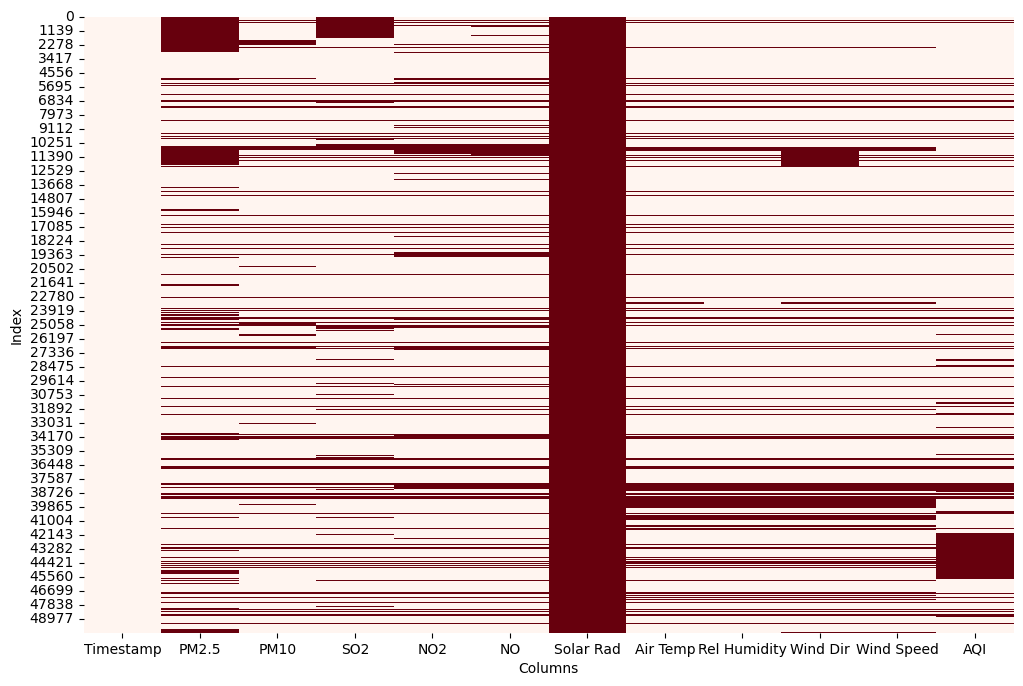

In [5]:
# Plotting the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(Penrose.isnull(), cbar=False, cmap='Reds')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

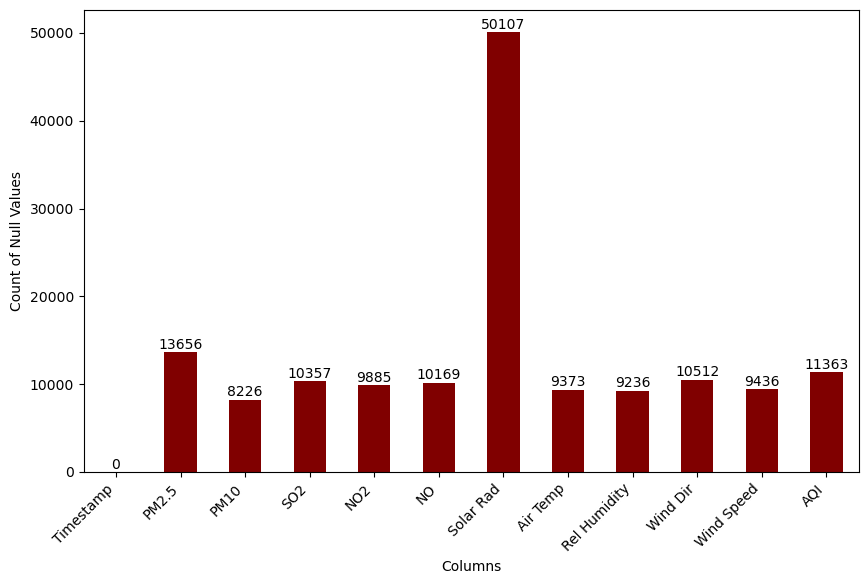

In [6]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 6))

# Creating a bar plot for the null_counts 
ax = null_counts.plot(kind='bar', color='#800000')

# Adding title and labels to the plot
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')

# Annotating the bar plot with the count of null values
for i, value in enumerate(null_counts):
    ax.text(i, value + 50, str(value), ha='center', va='bottom')
    
# Displaying the plot
plt.show()

In [7]:
# Dropping rows where 'PM2.5' values are null
Penrose.dropna(subset=['PM2.5'], inplace=True)

# Dropping rows where 'PM10' values are null
Penrose.dropna(subset=['PM10'], inplace=True)

# Dropping the 'Solar Rad' column from the DataFrame
Penrose.drop(columns=['Solar Rad'], inplace=True)

# Calculating the number of null values in each column of the updated DataFrame
null_counts = Penrose.isnull().sum()

In [8]:
null_counts

Timestamp          0
PM2.5              0
PM10               0
SO2             1408
NO2             2046
NO              2046
Air Temp        2037
Rel Humidity    1905
Wind Dir        2194
Wind Speed      2107
AQI             4131
dtype: int64

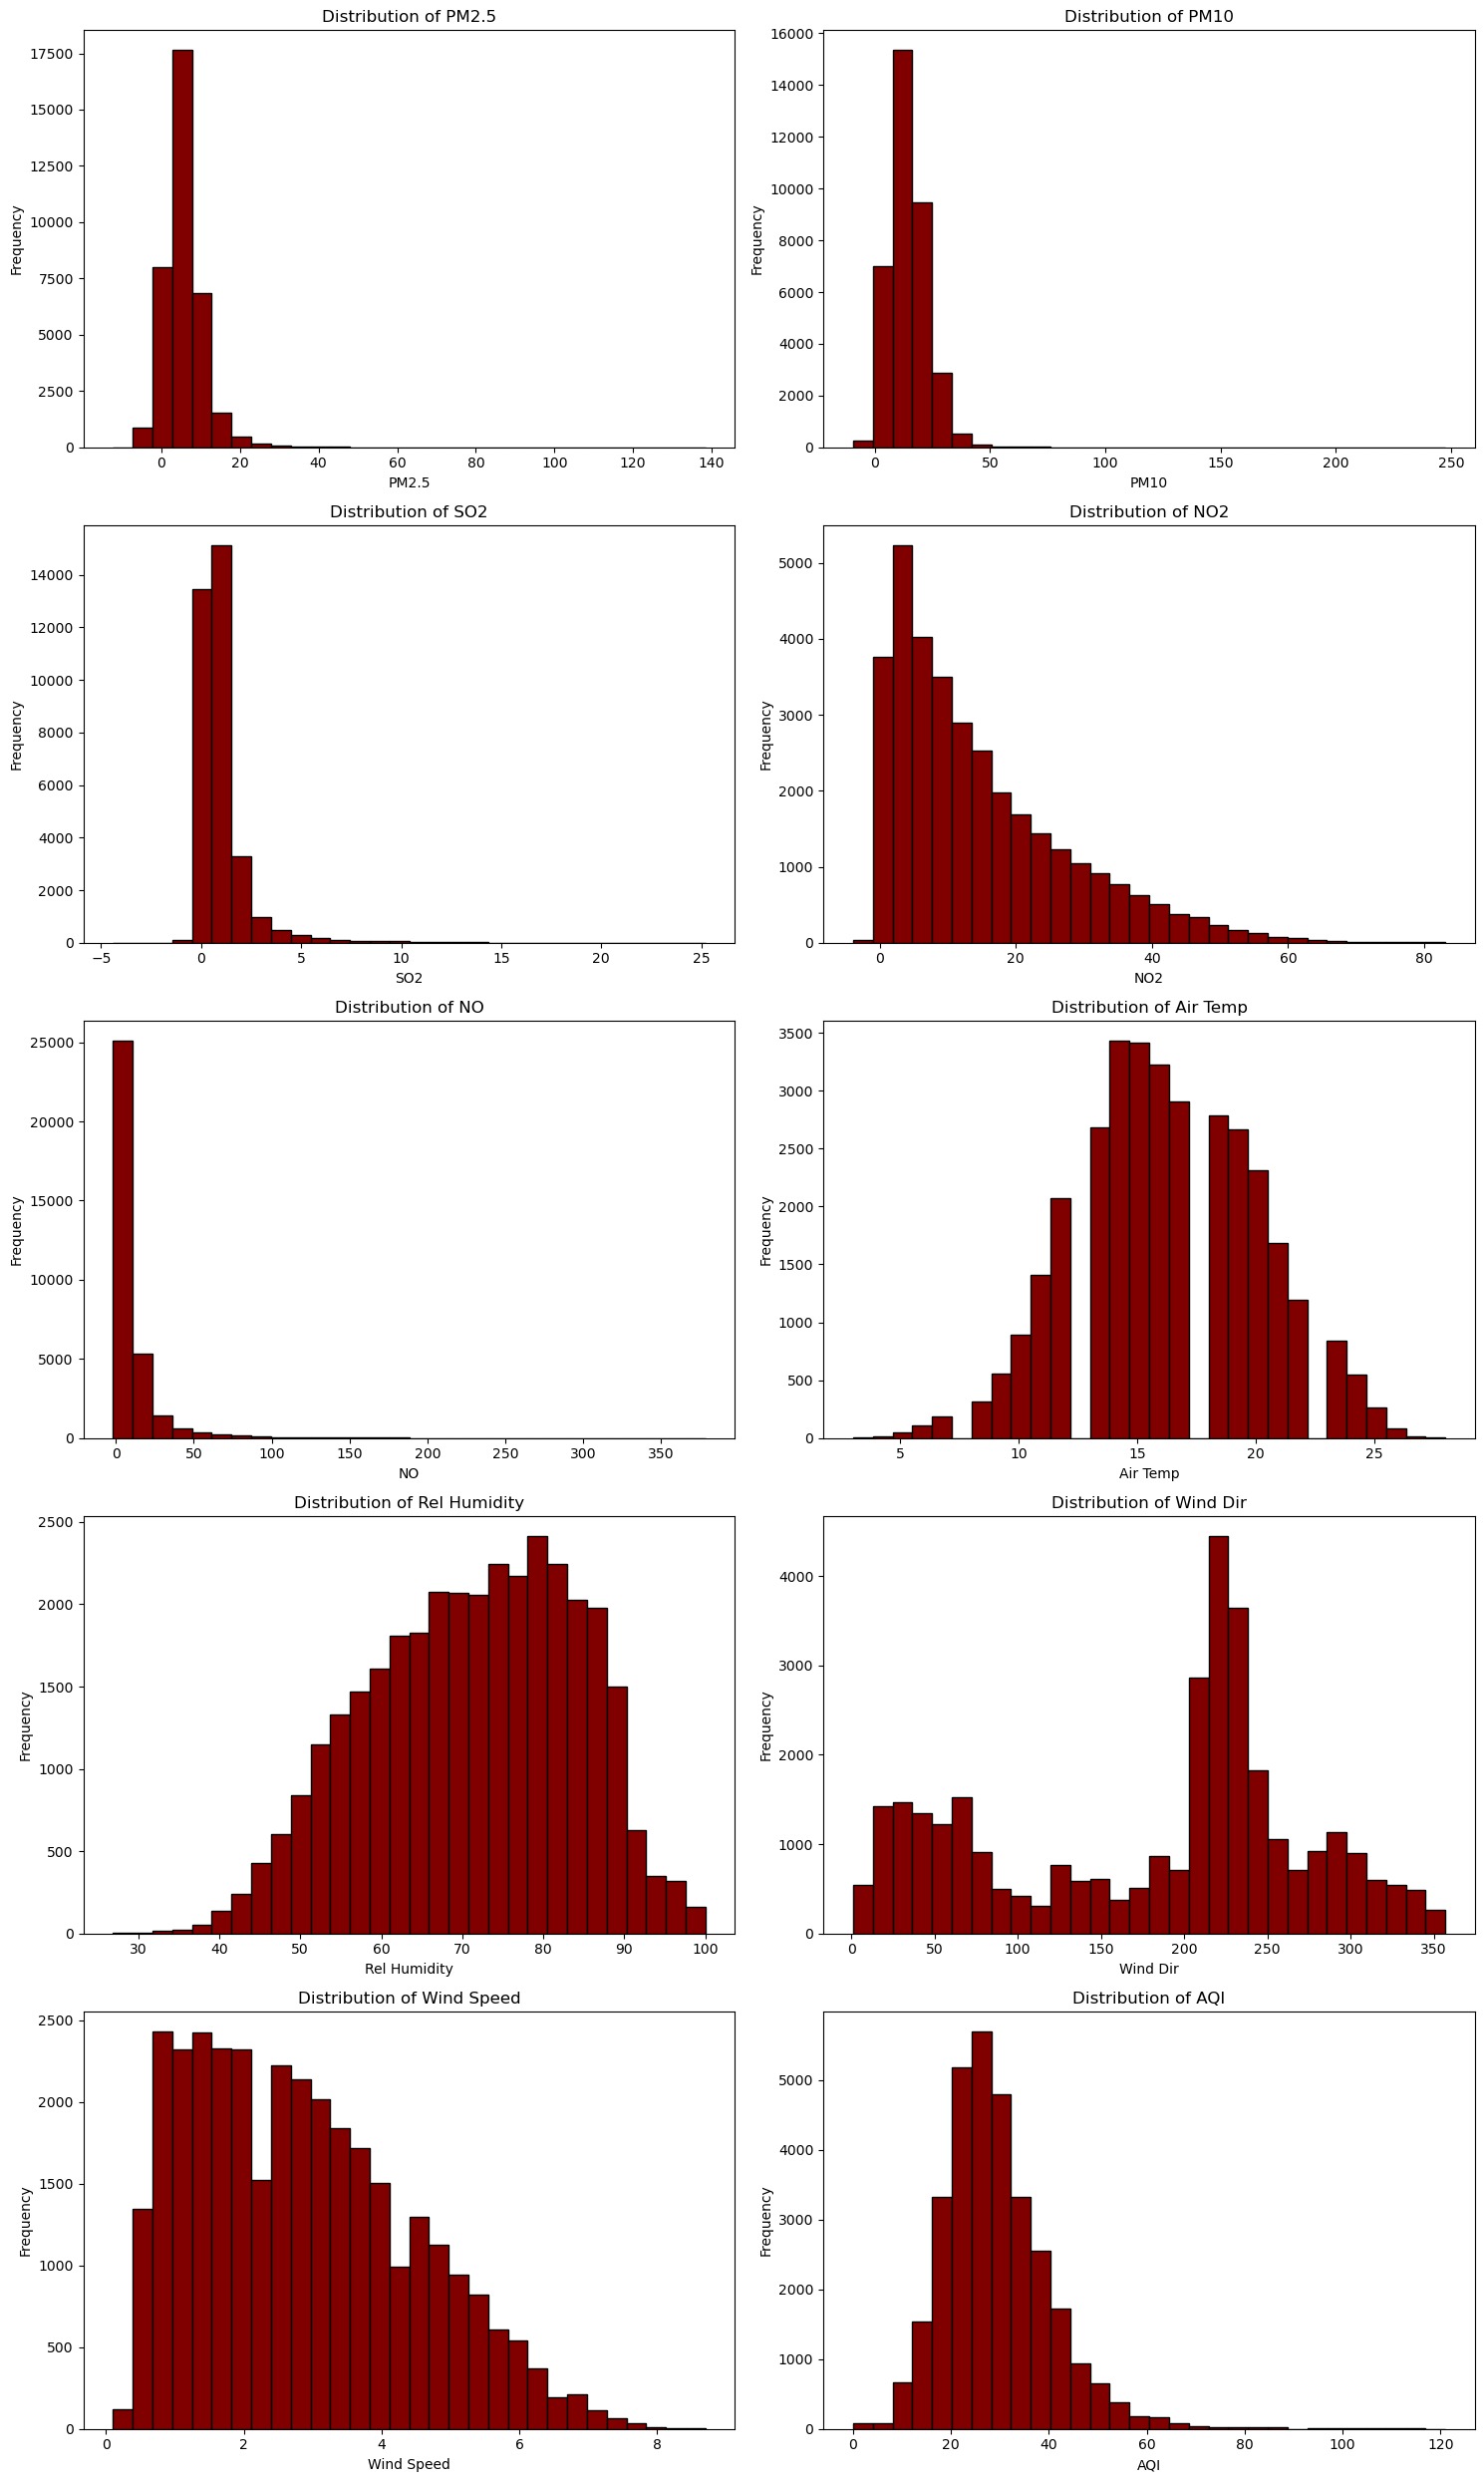

In [9]:
columns_to_plot = [
    'PM2.5', 'PM10', 'SO2', 'NO2', 'NO', 
    'Air Temp', 'Rel Humidity', 'Wind Dir', 
    'Wind Speed', 'AQI'
]

# Creating subplots with the corrected column names
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Looping through each column and plot a histogram
for i, column in enumerate(columns_to_plot):
    if column in Penrose.columns:
        axes[i].hist(Penrose[column], bins=30, edgecolor='black', color='#800000')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(False)
    else:
        axes[i].set_visible(False)

# Adjusting layout
plt.tight_layout()
plt.show()

In [10]:
# Identifying columns for each imputation strategy
columns_to_impute_with_median = ['PM2.5', 'PM10', 'SO2', 'NO2', 'NO', 'Wind Speed', 'AQI']
columns_to_impute_with_mean = ['Air Temp', 'Rel Humidity']
columns_to_impute_with_mode = ['Wind Dir']

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
Penrose[columns_to_impute_with_median] = median_imputer.fit_transform(Penrose[columns_to_impute_with_median])

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
Penrose[columns_to_impute_with_mean] = mean_imputer.fit_transform(Penrose[columns_to_impute_with_mean])

# Mode Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
Penrose[columns_to_impute_with_mode] = mode_imputer.fit_transform(Penrose[columns_to_impute_with_mode])

In [11]:
# Checking for remaining null values
null_counts = Penrose.isnull().sum()
null_counts

Timestamp       0
PM2.5           0
PM10            0
SO2             0
NO2             0
NO              0
Air Temp        0
Rel Humidity    0
Wind Dir        0
Wind Speed      0
AQI             0
dtype: int64

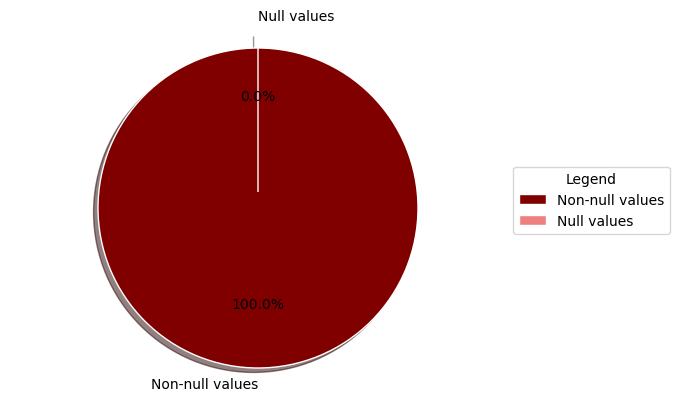

In [12]:
# Define the sizes and labels for the pie chart
labels = 'Non-null values', 'Null values'
sizes = [100, 0]  # 100% non-null, 0% null
colors = ['#800000', 'lightcoral']  # Custom color for non-null values
explode = (0.1, 0)  # explode the first slice

# Create the pie chart with legend
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(wedges, labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


# Handling Outliers

In [13]:
# Displaying summary statistics for the Penrose DataFrame
Penrose.describe()

,PM2.5,PM10,SO2,NO2,NO,Air Temp,Rel Humidity,Wind Dir,Wind Speed,AQI
count,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000
mean,5.682598,14.401188,0.975508,14.403180,9.668765,16.176263,71.233757,182.364540,2.820537,29.341205
std,4.896294,8.436348,1.354982,12.648987,19.897459,3.714113,12.406639,90.750806,1.546570,10.314201
min,-12.300000,-9.500000,-4.400000,-3.900000,-1.900000,3.000000,26.900000,1.000000,0.100000,0.000000
25%,2.800000,8.600000,0.300000,4.700000,1.000000,14.000000,62.400000,95.000000,1.600000,23.000000
50%,5.200000,13.500000,0.700000,10.800000,3.700000,16.000000,71.233757,217.000000,2.600000,28.000000
75%,7.800000,19.000000,1.200000,20.500000,10.200000,19.000000,80.800000,237.000000,3.800000,34.000000
max,138.400000,247.500000,25.200000,83.100000,378.400000,28.000000,100.000000,357.000000,8.700000,121.000000


In [14]:
# Counting negative values in specified columns
negative_counts = Penrose[['PM2.5', 'PM10', 'SO2', 'NO2', 'NO']].lt(0).sum()
negative_counts

PM2.5    2801
PM10      441
SO2      2487
NO2       182
NO        772
dtype: int64

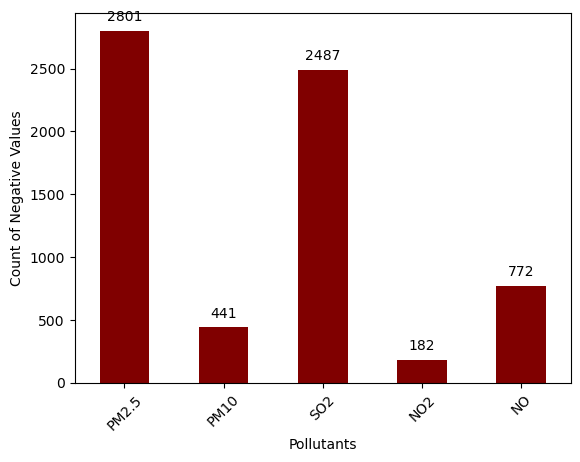

In [15]:
fig, ax = plt.subplots()
bars = negative_counts.plot(kind='bar', ax=ax, color='#800000')

# Adding text labels on the bars
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

ax.set_xlabel('Pollutants')
ax.set_ylabel('Count of Negative Values')

plt.xticks(rotation=45)
plt.show()

In [16]:
# List of columns to update negative values to median
columns_to_update = ['PM2.5', 'PM10', 'SO2', 'NO2', 'NO']

# Iterating over each column in the list
for column in columns_to_update:
    
    # Calculating the median value of the current column
    median_value = Penrose[column].median()
    
    # Updating the column values: replacing negative values with the median
    Penrose[column] = Penrose[column].apply(lambda x: median_value if x < 0 else x)

In [17]:
# Displaying summary statistics for the Penrose DataFrame
Penrose.describe()

,PM2.5,PM10,SO2,NO2,NO,Air Temp,Rel Humidity,Wind Dir,Wind Speed,AQI
count,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000,35697.000000
mean,6.231574,14.588234,1.037395,14.461310,9.754921,16.176263,71.233757,182.364540,2.820537,29.341205
std,4.373595,8.242637,1.319630,12.605904,19.862739,3.714113,12.406639,90.750806,1.546570,10.314201
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,26.900000,1.000000,0.100000,0.000000
25%,3.600000,8.900000,0.400000,4.800000,1.100000,14.000000,62.400000,95.000000,1.600000,23.000000
50%,5.200000,13.500000,0.700000,10.800000,3.700000,16.000000,71.233757,217.000000,2.600000,28.000000
75%,7.800000,19.000000,1.200000,20.500000,10.200000,19.000000,80.800000,237.000000,3.800000,34.000000
max,138.400000,247.500000,25.200000,83.100000,378.400000,28.000000,100.000000,357.000000,8.700000,121.000000


In [18]:
def calculate_iqr_bounds(dataframe, columns):
    # Initializing an empty list to store the bounds for each column
    bounds_list = []
    
    # Iterating over each column to calculate the IQR bounds
    for col in columns:            
        # Calculating the first and third quartiles (Q1 and Q3)
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        
        # Calculating the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Calculating the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #Identifying outliers based on the calculated bounds
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)][col]
        outlier_count = len(outliers)
    
        # Appending the results to the bounds list
        bounds_list.append({
            'Column': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_count
        })
        
    # Converting the bounds list to a DataFrame
    bounds_df = pd.DataFrame(bounds_list)
    return bounds_df

# Defining the columns to check for IQR bounds
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'NO', 'Air Temp', 'Rel Humidity', 'Wind Dir', 'Wind Speed', 'AQI']

# Calculating IQR bounds for each specified column
iqr_bounds_df = calculate_iqr_bounds(Penrose, columns_to_check)

# Printing the DataFrame
iqr_bounds_df

,Column,Lower Bound,Upper Bound,Outlier Count
0,PM2.5,-2.70,14.10,1765
1,PM10,-6.25,34.15,626
2,SO2,-0.80,2.40,2505
3,NO2,-18.75,44.05,1253
4,NO,-12.55,23.85,3161
5,Air Temp,6.50,26.50,201
6,Rel Humidity,34.80,108.40,25
7,Wind Dir,-118.00,450.00,0
8,Wind Speed,-1.70,7.10,143
9,AQI,6.50,50.50,1406


In [19]:
def remove_outliers(dataframe, columns):
    while True:
        iqr_bounds_df = calculate_iqr_bounds(dataframe, columns)
        
        # Checking if there are any outliers left
        total_outliers = iqr_bounds_df['Outlier Count'].sum()
        if total_outliers == 0:
            break
            
        # Removing outliers
        for index, row in iqr_bounds_df.iterrows():
            col = row['Column']
            lower_bound = row['Lower Bound']
            upper_bound = row['Upper Bound']
            dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    return dataframe

columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'NO', 'Air Temp', 'Rel Humidity', 'Wind Dir', 'Wind Speed', 'AQI']

# Removing outliers and updating the Penrose DataFrame
Penrose = remove_outliers(Penrose, columns_to_check)


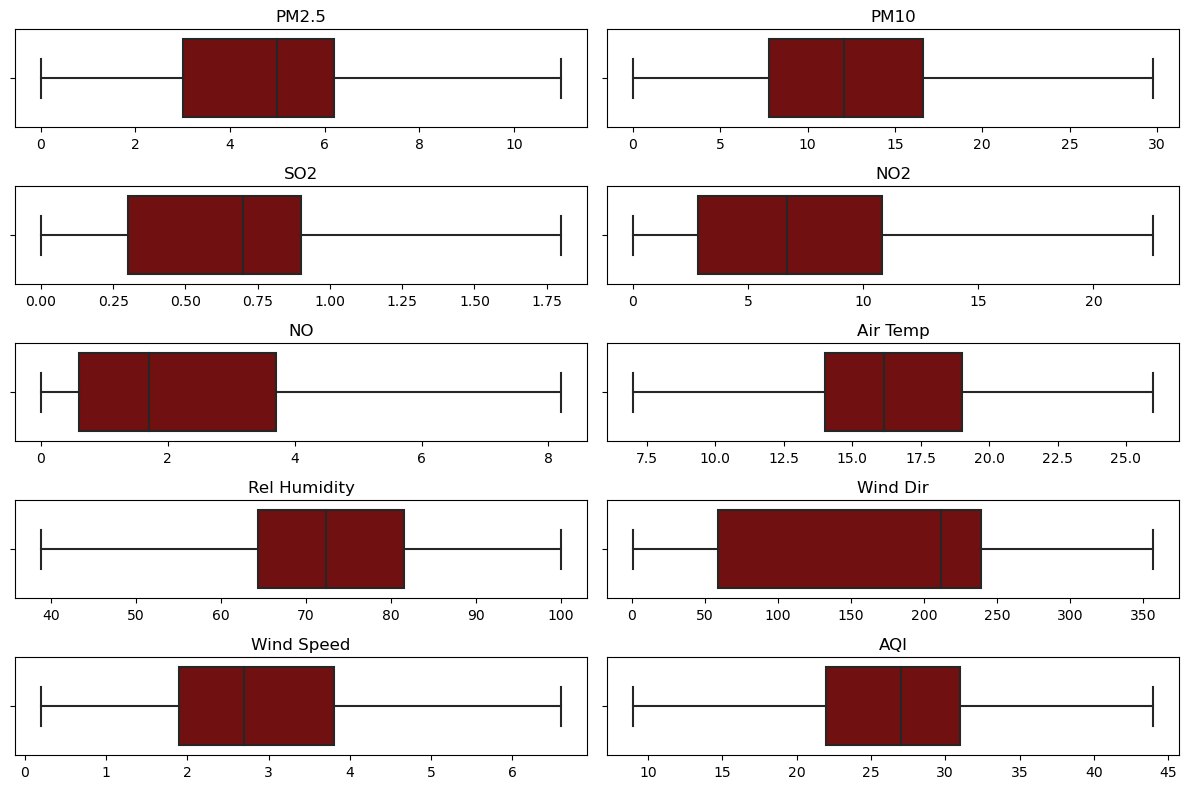

In [20]:
columns_to_check = ['PM2.5','PM10','SO2', 'NO2', 'NO', 'Air Temp', 'Rel Humidity', 'Wind Dir', 'Wind Speed','AQI']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=Penrose[column], color='#800000')
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Data Exploration 

## Exploring the relationship between PM2.5 and PM10

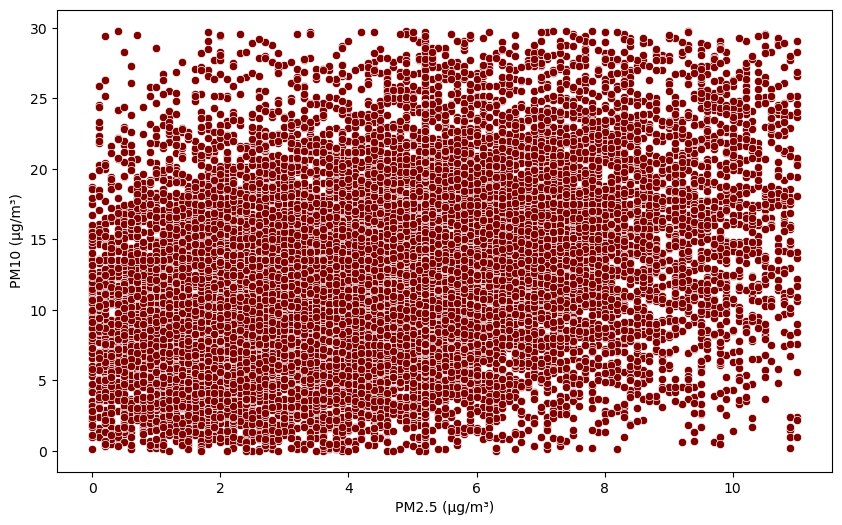

In [21]:
# Plotting the relationship between PM2.5 and PM10
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Penrose, x='PM2.5', y='PM10', color='#800000')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.grid(False)
plt.show()

In [22]:
# Calculating the correlation between PM2.5 and PM10
correlation = Penrose['PM2.5'].corr(Penrose['PM10'])
correlation

0.29287248032311713

In [23]:
# Dropping PM10 column
Penrose.drop(columns=['PM10'], inplace=True)

In [24]:
# Converting the 'Timestamp' column to datetime format with day first
Penrose['Timestamp'] = pd.to_datetime(Penrose['Timestamp'], dayfirst=True)

# Extracting the year from the 'Timestamp' column and create a new 'Year' column
Penrose['Year'] = Penrose['Timestamp'].dt.year

# Extracting the month from the 'Timestamp' column and create a new 'Month' column
Penrose['Month'] = Penrose['Timestamp'].dt.month

# Extracting the day from the 'Timestamp' column and create a new 'Day' column
Penrose['Day'] = Penrose['Timestamp'].dt.day

# Extracting the hour from the 'Timestamp' column and create a new 'Hour' column
Penrose['Hour'] = Penrose['Timestamp'].dt.hour

## Exploring AQI 

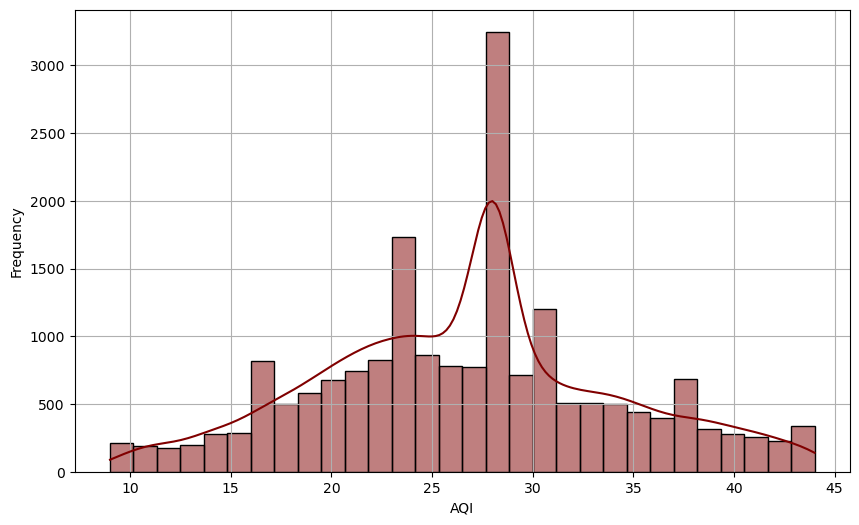

In [25]:
# Plotting distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(Penrose['AQI'], bins=30, kde=True, color='#800000')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

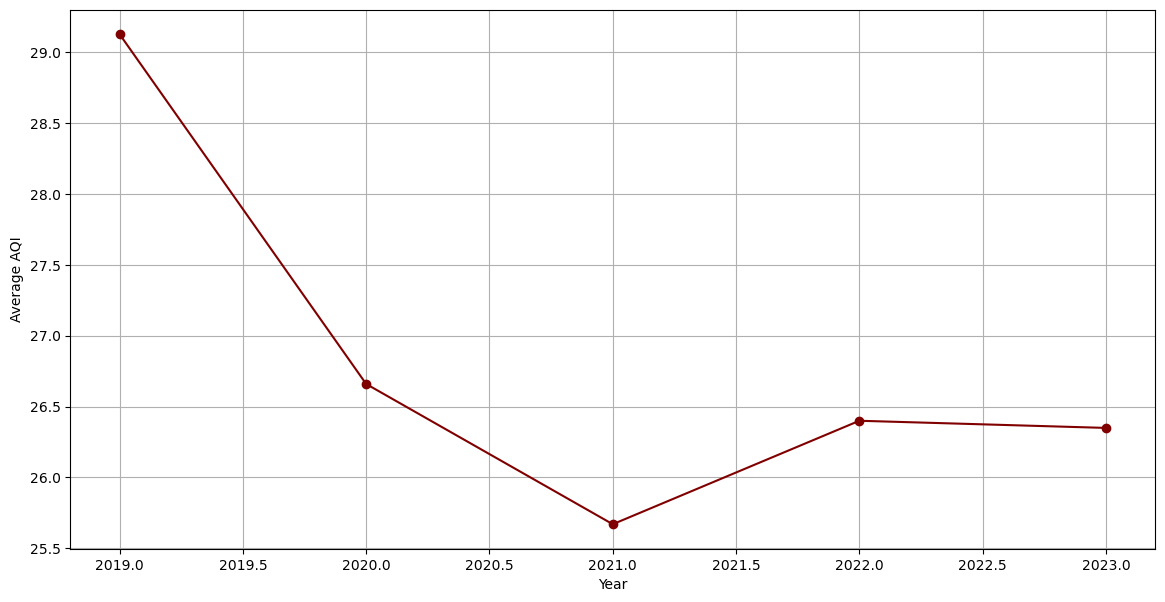

In [26]:
yearly_avg_aqi = Penrose.groupby('Year')['AQI'].mean()

# Plotting the AQI trend over the years
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_aqi.index, yearly_avg_aqi, marker='o', linestyle='-', color='#800000')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

In [27]:
# Finding the variable with the highest correlation to AQI
corr_matrix = Penrose.corr()
corr_with_aqi = corr_matrix['AQI'].drop('AQI').sort_values(ascending=False)

# Displaying the variable with the highest correlation to AQI
corr_with_aqi

PM2.5           0.223309
Wind Speed      0.118743
NO              0.085081
Wind Dir        0.057479
Air Temp        0.037127
NO2             0.024715
Hour           -0.002269
Month          -0.013739
Day            -0.016025
SO2            -0.043748
Year           -0.087592
Timestamp      -0.093190
Rel Humidity   -0.117117
Name: AQI, dtype: float64

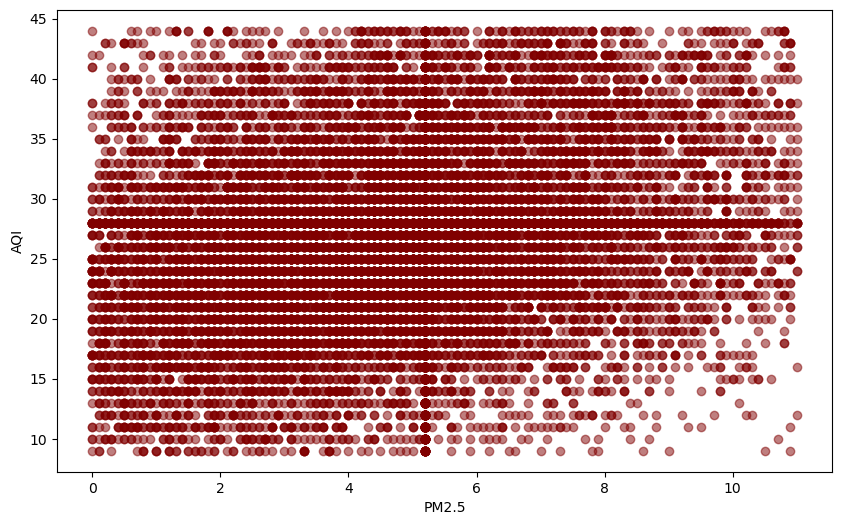

In [28]:
# Plotting AQI vs PM2.5
plt.figure(figsize=(10, 6))
plt.scatter(Penrose['PM2.5'], Penrose['AQI'], alpha=0.5, color='#800000')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.grid(False)
plt.show()

In [29]:
# Dropping AQI column
Penrose.drop(columns=['AQI'], inplace=True)

## Exploring Particulate Matter Trends

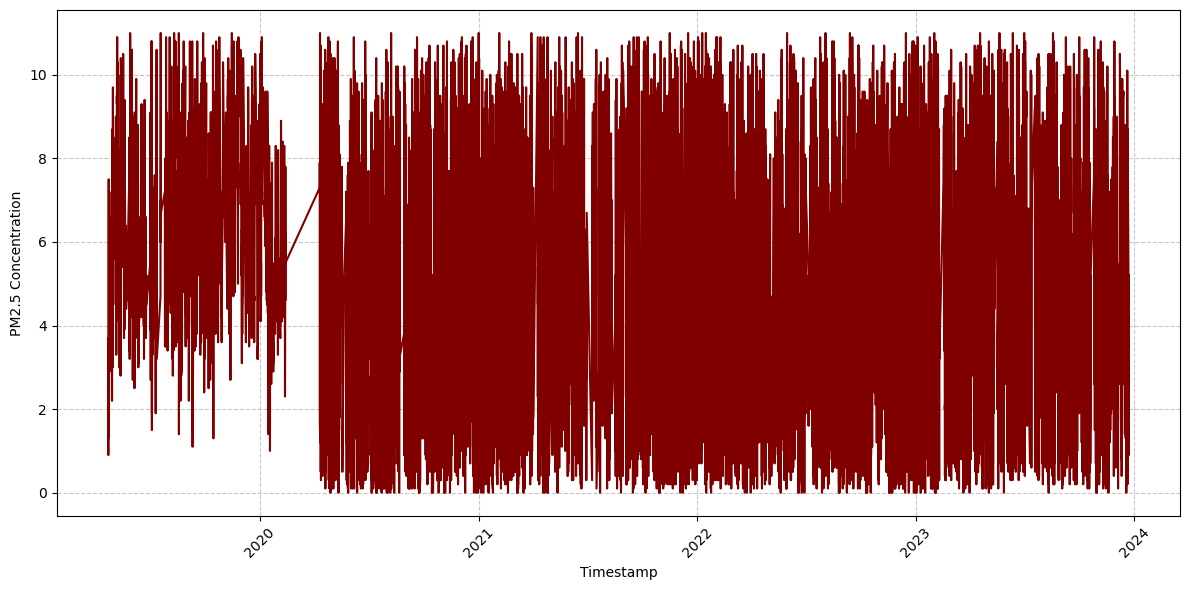

In [30]:
# Plotting daily PM2.5 concentrarion over time
plt.figure(figsize=(12, 6))
plt.plot(Penrose['Timestamp'], Penrose['PM2.5'], color='#800000')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

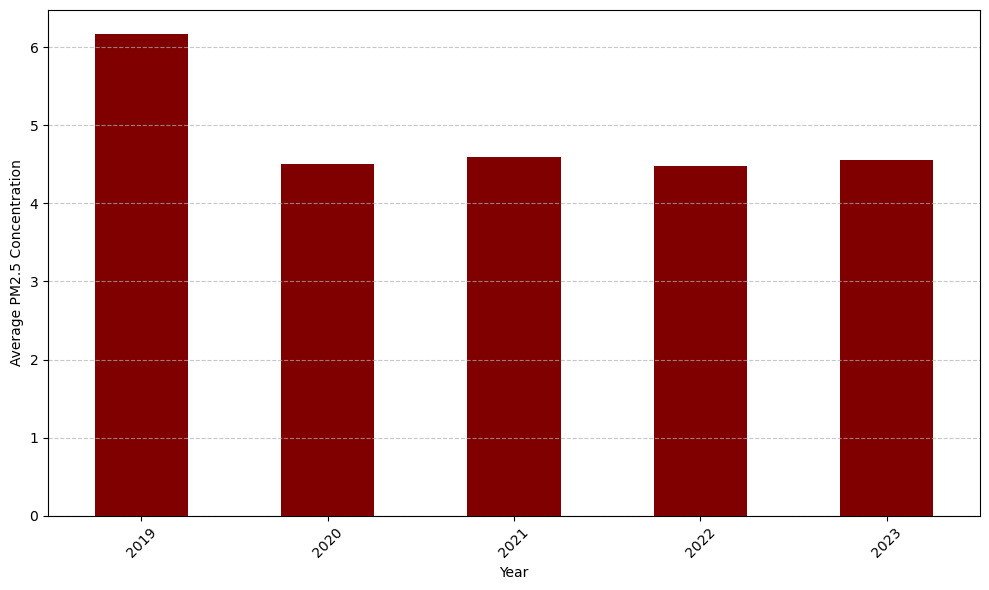

In [31]:
# Plotting avg PM2.5 concentrarion per year
pm25_by_year = Penrose.groupby('Year')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
pm25_by_year.plot(kind='bar', color='#800000')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

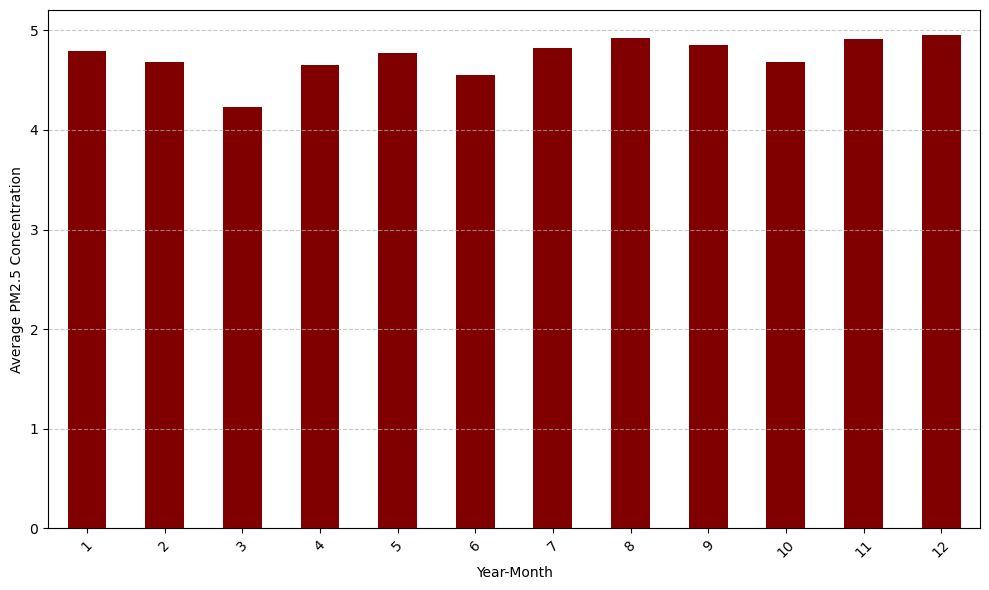

In [32]:
# Plotting avg PM2.5 concentrarion per month
pm25_by_month = Penrose.groupby('Month')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
pm25_by_month.plot(kind='bar', color='#800000')
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

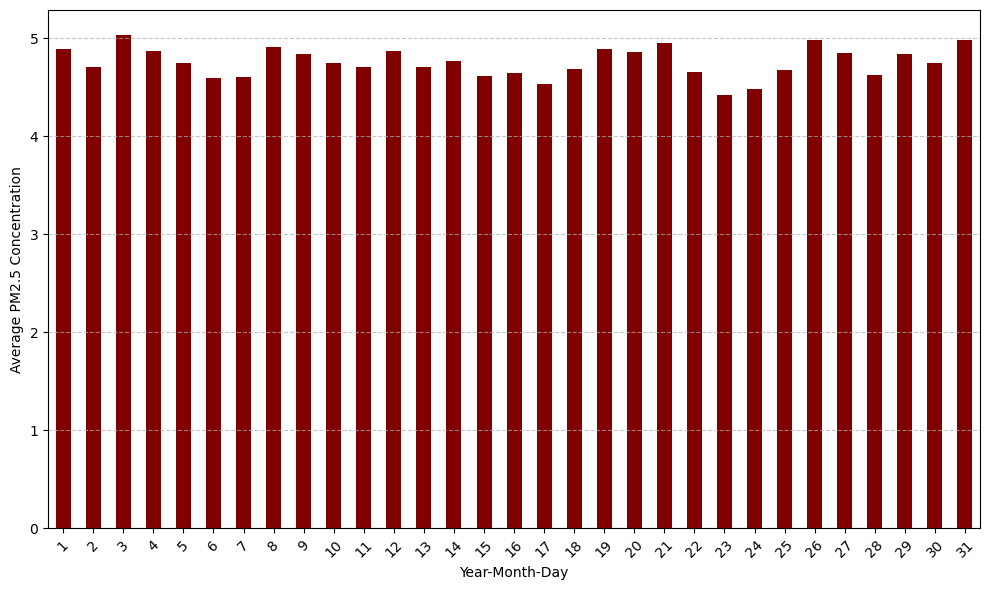

In [33]:
# Plotting avg PM2.5 concentrarion per day
pm25_by_day = Penrose.groupby('Day')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
pm25_by_day.plot(kind='bar', color='#800000')
plt.xlabel('Year-Month-Day')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

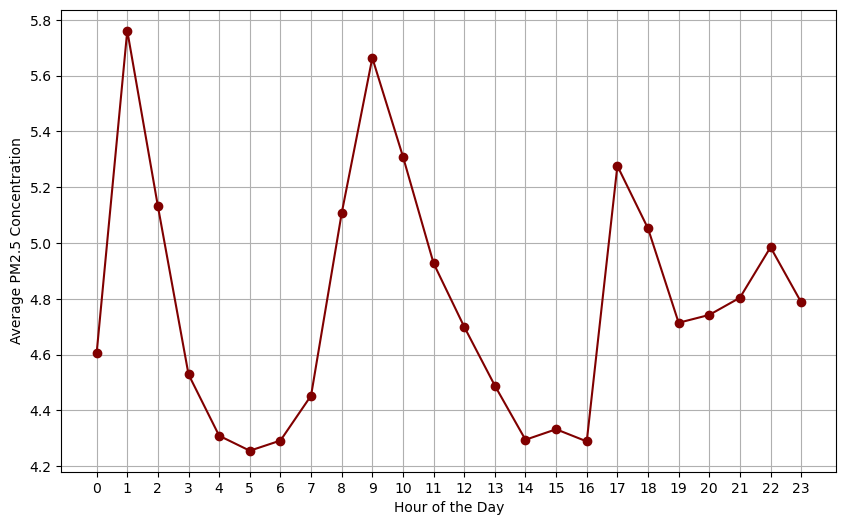

In [34]:
# Plotting avg PM2.5 concentrarion by hour
hourly_avg_pm25 = Penrose.groupby('Hour')['PM2.5'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_pm25, marker='o', linestyle='-', color='#800000')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Concentration')
plt.xticks(range(24))
plt.grid(True)
plt.show()

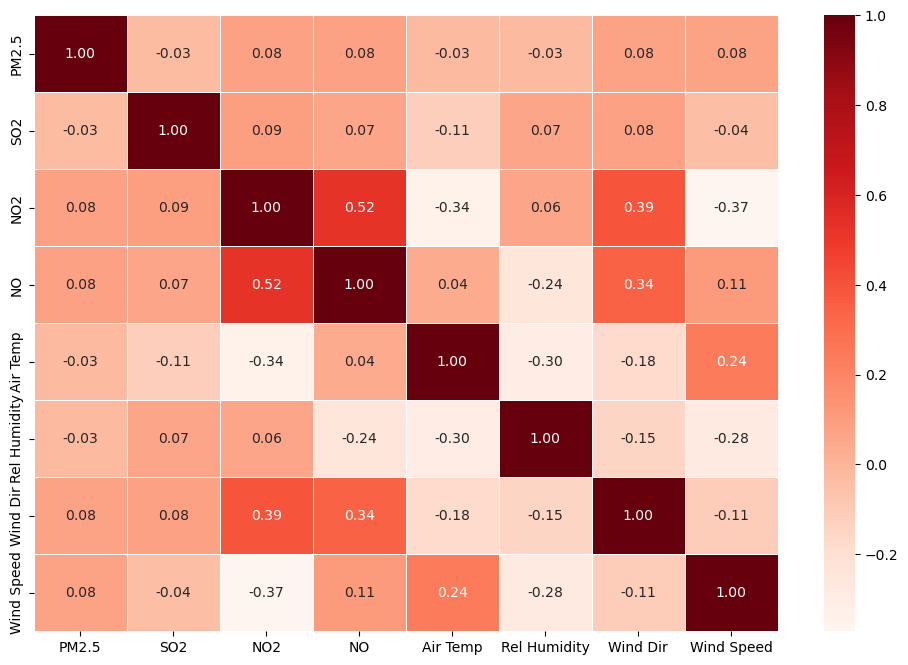

In [35]:
# Defining the columns of interest for the correlation analysis
columns_of_interest = ['PM2.5','SO2', 'NO2', 'NO', 'Air Temp', 'Rel Humidity', 'Wind Dir', 'Wind Speed']

# Selecting the data from the Penrose dataframe corresponding to the columns of interest
data = Penrose[columns_of_interest]

# Calculating the correlation matrix for the selected data
correlation_matrix = data.corr()

# Setting the figure size to 12 inches by 8 inches
plt.figure(figsize=(12, 8))

# Creating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)

# Displaying the heatmap
plt.show()

In [36]:
# Extracting the correlation values of 'PM2.5' with all other attributes
pm25_correlations = correlation_matrix['PM2.5']

# Dropping the 'PM2.5' correlation with itself and sort the remaining correlations in descending order
sorted_correlations = pm25_correlations.drop('PM2.5').sort_values(ascending=False)

# Printing the sorted correlations
print("All attributes with their correlation with PM2.5:")
print(sorted_correlations)

All attributes with their correlation with PM2.5:
NO              0.083040
NO2             0.080882
Wind Dir        0.075138
Wind Speed      0.075072
Air Temp       -0.026057
Rel Humidity   -0.028183
SO2            -0.029109
Name: PM2.5, dtype: float64


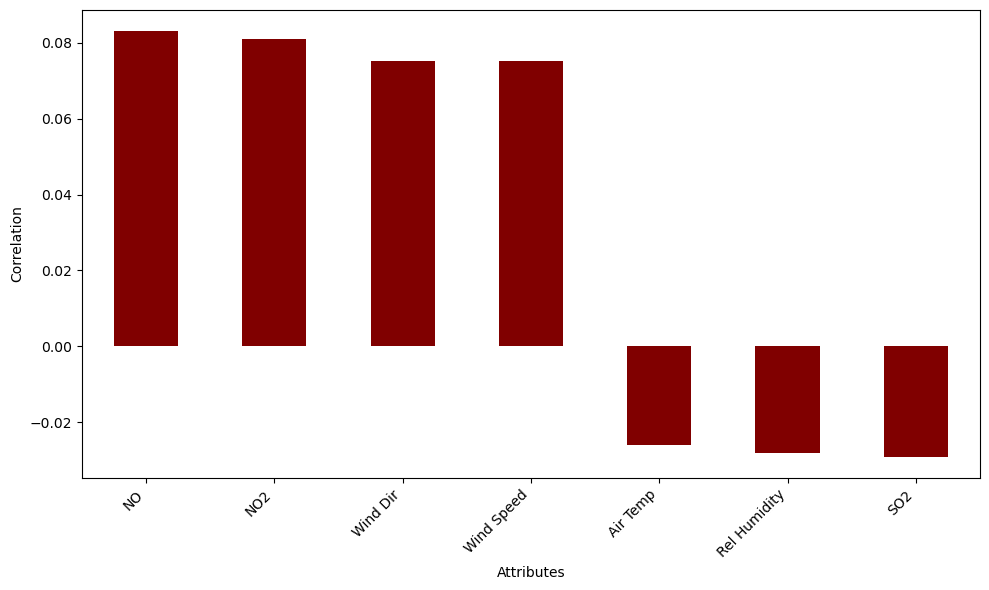

In [38]:
#Plotting correlation of attributes with PM2.5
plt.figure(figsize=(10, 6))
sorted_correlations.plot(kind='bar', color='#800000')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analysis of Selected Attributes and Their Influence on PM Concentration

In [39]:
# Defining the list of selected columns for descriptive statistics analysis
selected_columns = ['SO2','NO', 'NO2', 'Wind Dir', 'Wind Speed']

# Selecting the data from the Penrose dataframe corresponding to the selected columns
Penrose_selected = Penrose[selected_columns]

# Computing the descriptive statistics for the selected columns
descriptive_stats = Penrose_selected.describe()

# Printing the descriptive statistics
descriptive_stats

,SO2,NO,NO2,Wind Dir,Wind Speed
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,0.630875,2.391850,7.629892,165.680025,2.931826
std,0.418323,2.045454,5.479471,102.199127,1.358108
min,0.000000,0.000000,0.000000,1.000000,0.200000
25%,0.300000,0.600000,2.800000,59.000000,1.900000
50%,0.700000,1.700000,6.700000,212.000000,2.700000
75%,0.900000,3.700000,10.800000,239.000000,3.800000
max,1.800000,8.200000,22.600000,357.000000,6.600000


In [40]:
# Selecting the features for calculating the Variance Inflation Factor (VIF)
X = Penrose[['SO2','NO', 'NO2', 'Wind Dir', 'Wind Speed']]

# Initializing an empty DataFrame to store VIF values
vif_data = pd.DataFrame()

# Adding a column to the DataFrame with the names of the features
vif_data['feature'] = X.columns

# Calculating the VIF for each feature and store it in the DataFrame
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Printing the DataFrame containing features and their corresponding VIF values
vif_data

,feature,VIF
0,SO2,2.889129
1,NO,3.748368
2,NO2,4.349267
3,Wind Dir,4.073059
4,Wind Speed,3.180510


In [41]:
# Selecting the predictor variables for the regression model
X = Penrose[['SO2','NO', 'NO2', 'Wind Dir', 'Wind Speed']]

# Selecting the target variable for the regression model
y = Penrose['PM2.5']

# Adding a constant term to the predictor variables matrix for the intercept
X = sm.add_constant(X)

# Fitting an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     88.83
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.08e-92
Time:                        21:17:17   Log-Likelihood:                -44115.
No. Observations:               19239   AIC:                         8.824e+04
Df Residuals:                   19233   BIC:                         8.829e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7041      0.067     55.474      0.0

# Summary Statistics of PM Concentration

In [42]:
# Printing the descriptive statistics for the 'PM2.5' column in the Penrose dataframe
print(Penrose['PM2.5'].describe())

count    19239.000000
mean         4.754358
std          2.424171
min          0.000000
25%          3.000000
50%          5.000000
75%          6.200000
max         11.000000
Name: PM2.5, dtype: float64


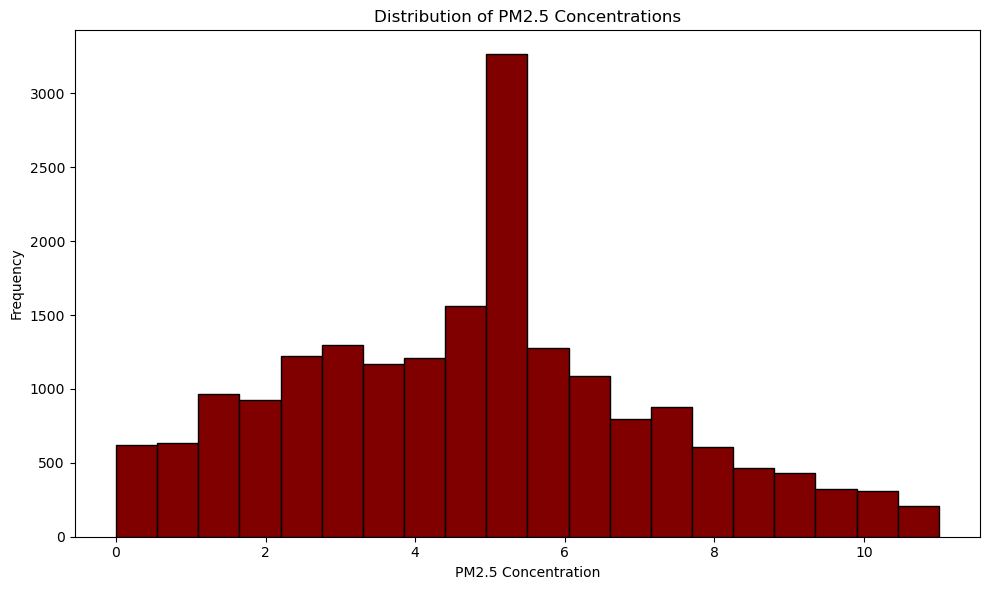

In [43]:
# Plotting distribution of PM2.5
plt.figure(figsize=(10, 6))
plt.hist(Penrose['PM2.5'], bins=20, color='#800000', edgecolor='black')
plt.title('Distribution of PM2.5 Concentrations')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary Statistics of Predictors

In [44]:
# Defining the list of predictor variables
predictors = ['SO2','NO2', 'NO', 'Wind Dir', 'Wind Speed']

# Selecting the predictor variables from the Penrose dataframe
Penrose_predictors = Penrose[predictors]

# Computing the summary statistics for the predictor variables
summary = Penrose_predictors.describe()

# Converting the summary statistics to a DataFrame
summary_df = pd.DataFrame(summary)

# Displaying the summary statistics DataFrame
summary_df

,SO2,NO2,NO,Wind Dir,Wind Speed
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,0.630875,7.629892,2.391850,165.680025,2.931826
std,0.418323,5.479471,2.045454,102.199127,1.358108
min,0.000000,0.000000,0.000000,1.000000,0.200000
25%,0.300000,2.800000,0.600000,59.000000,1.900000
50%,0.700000,6.700000,1.700000,212.000000,2.700000
75%,0.900000,10.800000,3.700000,239.000000,3.800000
max,1.800000,22.600000,8.200000,357.000000,6.600000


# Experimental Methods

In [45]:
# Seting the 'Timestamp' column as the index of the Penrose DataFrame
Penrose.set_index('Timestamp', inplace=True)

In [46]:
# Calculating the number of missing timestamps by checking the difference between consecutive timestamps
# Converting the index to a series and calculate the difference
# Checking where the difference is not equal to one hour and sum these occurrences, subtracting 1 to get the count
missing_timestamps = Penrose.index.to_series().diff().ne(pd.Timedelta(hours=1)).sum() - 1

# Checking if there are any missing timestamps
if missing_timestamps == 0:
    # If no missing timestamps, set the frequency of the index to hourly
    Penrose.index.freq = 'H'
else:
    # Printing a message indicating the number of missing or irregular timestamps
    print(f"Found {missing_timestamps} missing or irregular timestamps. Cannot set frequency to 'H'.")


Found 3194 missing or irregular timestamps. Cannot set frequency to 'H'.


In [47]:
# Resampling the Penrose DataFrame to hourly frequency, filling in missing timestamps with NaN values
Penrose_resampled = Penrose.resample('H').asfreq()

# Interpolating the missing values using time interpolation method
Penrose_interpolated = Penrose_resampled.interpolate(method='time')

# Assigning the interpolated DataFrame back to Penrose
Penrose = Penrose_interpolated

# Setting the frequency of the index to hourly
Penrose.index.freq = 'H'

## Multilayer Perceptron (MLP)


In [48]:
# Creating a new column 'Lag1' which contains the PM2.5 values shifted by 1 hour
Penrose['Lag1'] = Penrose['PM2.5'].shift(1)

# Creating a new column 'Lag2' which contains the PM2.5 values shifted by 2 hours
Penrose['Lag2'] = Penrose['PM2.5'].shift(2)

# Dropping any rows with NaN values, which will be present in the first two rows due to the lagging operation
Penrose = Penrose.dropna()

In [49]:
# Selecting the features (SO2, NO, NO2, Wind Dir, Wind Speed, Lag1, Lag2) and target variable (PM2.5)
X = Penrose[['SO2', 'NO', 'NO2', 'Wind Dir', 'Wind Speed', 'Lag1', 'Lag2']].values
y = Penrose['PM2.5'].values

# Initializing the MinMaxScaler to scale features to a range between 0 and 1
scaler = MinMaxScaler()

# Fitting the scaler on the features and transforming the features
features_scaled = scaler.fit_transform(X)

# Assigning the scaled features back to X
X = features_scaled

# Determining the size of the training set (70% of the data)
train_size = int(len(X) * 0.7)

# Splitting the data into training and testing sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Question 2

In [50]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

# Dictionary to store results
results = {}

for lr in learning_rates:
    # Initializing the MLPRegressor with the current learning rate
    mlp = MLPRegressor(hidden_layer_sizes=(25,), learning_rate_init=lr, random_state=42, max_iter=1000)
    
    # Training the model
    mlp.fit(X_train, y_train)
    
    # Making predictions on the testing set
    y_pred = mlp.predict(X_test)
    
    # Calculating the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Storing the results
    results[lr] = mse

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(list(results.items()), columns=['Learning Rate', 'MSE'])
results_df.sort_values(by='MSE', inplace=True)
results_df

,Learning Rate,MSE
1,0.0010,2.650357
2,0.0100,2.708926
3,0.1000,2.730524
4,0.2000,2.777371
0,0.0001,2.829044
5,0.3000,2.856086


Number of iterations:  28


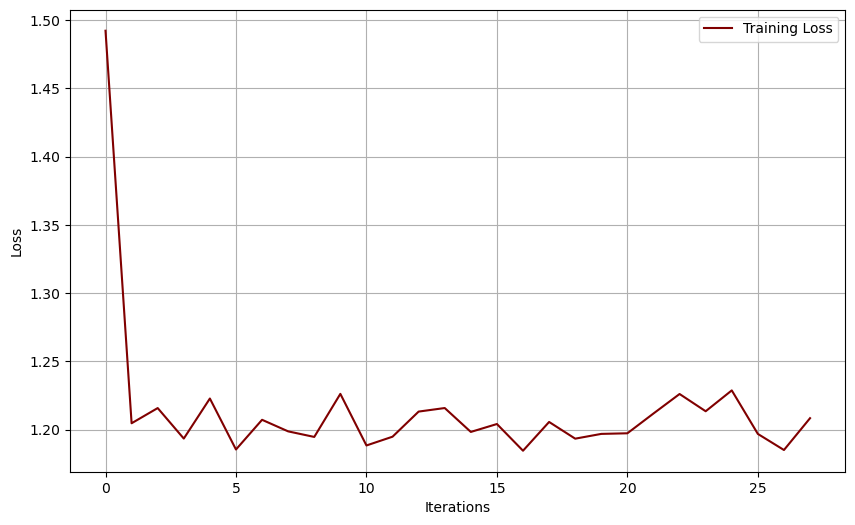

In [52]:
# Printing the number of iterations the MLP has run
print("Number of iterations: ", mlp.n_iter_)

# Retrieving the loss values over the iterations
loss_values = mlp.loss_curve_

# Plotting the loss values
plt.figure(figsize=(10, 6))  
plt.plot(loss_values, label='Training Loss', color='#800000')  
plt.xlabel('Iterations')  
plt.ylabel('Loss')  
plt.legend()  
plt.grid(True) 
plt.show()  

### Question 3

In [53]:
k = 25

# Dictionary to store results
results = []

# Iterating over the possible splits of neurons across two layers
for i in range(1, k):
    neurons_layer1 = k - i
    neurons_layer2 = i
    
    # Initializing the MLPRegressor with the current configuration of neurons
    mlp = MLPRegressor(hidden_layer_sizes=(neurons_layer1, neurons_layer2), learning_rate_init=0.0010, random_state=42, max_iter=1000)
    
    # Training the model
    mlp.fit(X_train, y_train)
    
    # Making predictions on the testing set
    y_pred = mlp.predict(X_test)
    
    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    
    # Storing the results
    results.append({
        'Neurons in Layer1': neurons_layer1,
        'Neurons in Layer2': neurons_layer2,
        'MSE': mse
    })

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.sort_values(by='MSE', inplace=True)
results_df

,Neurons in Layer1,Neurons in Layer2,MSE
8,16,9,2.631156
13,11,14,2.634235
20,4,21,2.635046
10,14,11,2.636435
12,12,13,2.637026
14,10,15,2.645188
16,8,17,2.645447
4,20,5,2.646758
6,18,7,2.651487
7,17,8,2.652482


Number of iterations:  68


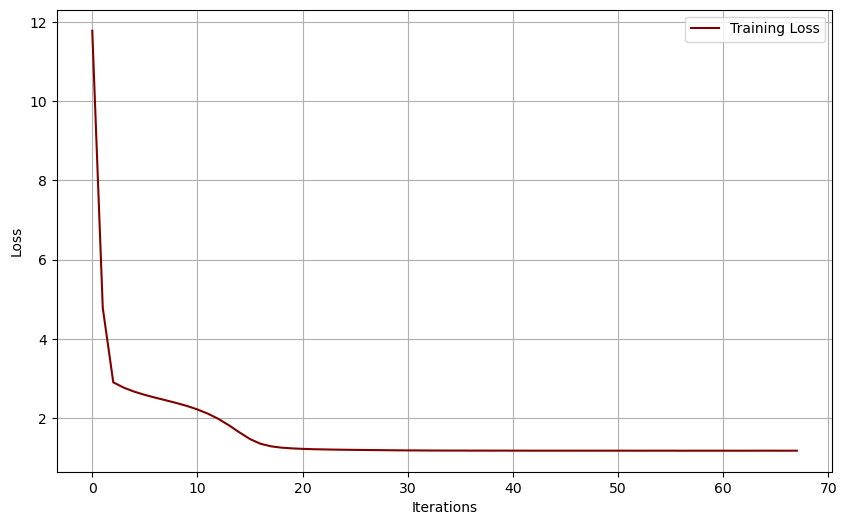

In [54]:
# Printing the number of iterations the MLP has run
print("Number of iterations: ", mlp.n_iter_)

# Retrieving the loss values over the iterations
loss_values = mlp.loss_curve_

# Plotting the loss values
plt.figure(figsize=(10, 6))  
plt.plot(loss_values, label='Training Loss',color='#800000')  
plt.xlabel('Iterations')  
plt.ylabel('Loss')  
plt.legend()  
plt.grid(True) 
plt.show()  

### Final Model 

In [51]:
# Initializing the MLPRegressor with specific parameters
mlp = MLPRegressor(hidden_layer_sizes=(16, 9), # Defines the architecture with two hidden layers: one with 16 neurons and one with 9 neurons
                   learning_rate_init=0.001,   # Sets the initial learning rate
                   random_state=42,            # Ensures reproducibility by setting a random state
                   max_iter=1000)              # Sets the maximum number of iterations for training

# Training the MLPRegressor with the training data
mlp.fit(X_train, y_train)

# Making predictions on the test data
y_pred = mlp.predict(X_test)

# Calculating the Mean Squared Error (MSE) between the true and predicted values
mse = mean_squared_error(y_test, y_pred)

# Calculating the Mean Absolute Error (MAE) between the true and predicted values
mae = mean_absolute_error(y_test, y_pred)

# Calculating the Root Mean Squared Error (RMSE) from the MSE
rmse = np.sqrt(mse)

# Calculating the R-squared (R²) score, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.0245202764213313
Mean Squared Error (MSE): 2.631155998638141
Root Mean Squared Error (RMSE): 1.6220838445154866
R-squared (R²): 0.49495695954857133


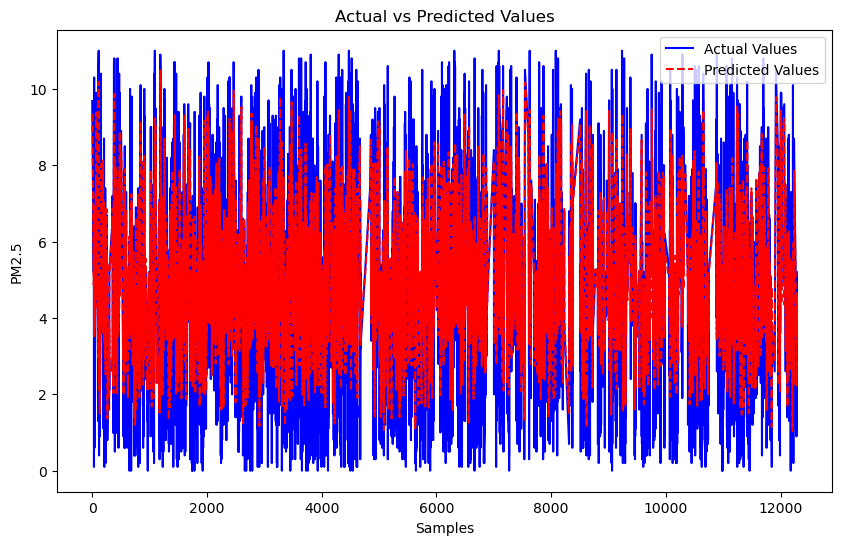

In [52]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

# Long Short-Term Memory (LSTM)

In [48]:
# Selecting the features (SO2, NO, NO2, Wind Dir, Wind Speed) from the DataFrame and converting them to a numpy array
X = Penrose[['SO2', 'NO', 'NO2', 'Wind Dir', 'Wind Speed']].values

# Selecting the target variable (PM2.5) from the DataFrame and converting it to a numpy array
y = Penrose['PM2.5'].values

# Initializing the MinMaxScaler to scale features to a range between 0 and 1
scaler = MinMaxScaler()

# Fitting the scaler on the features and transforming the features to scale them
X_scaled = scaler.fit_transform(X)

# Determining the size of the training set (70% of the data)
train_size = int(len(X_scaled) * 0.7)

# Splitting the scaled features into training and validation sets
X_train, X_val = X_scaled[:train_size], X_scaled[train_size:]

# Splitting the target variable into training and validation sets
y_train, y_val = y[:train_size], y[train_size:]


In [49]:
# Function to create a dataset for LSTM models by including time steps
def create_dataset(X, y, time_step):
    Xs, ys = [], []  # Initialize empty lists to hold the input-output pairs
    for i in range(len(X) - time_step):  # Looping over the dataset, leaving out the last 'time_step' elements
        # Appending a slice of 'time_step' length from 'X' to 'Xs'
        Xs.append(X[i:(i + time_step)])
        # Appending the corresponding value from 'y' to 'ys'
        ys.append(y[i + time_step])
    # Returning the lists as numpy arrays
    return np.array(Xs), np.array(ys) 

# Setting the number of time steps to be used by the LSTM
time_step = 2

# Creating the training dataset for the LSTM model
X_train_lstm, y_train_lstm = create_dataset(X_train, y_train, time_step)

# Creating the validation dataset for the LSTM model
X_val_lstm, y_val_lstm = create_dataset(X_val, y_val, time_step)

# Checking the shapes of the datasets to ensure they are correctly formed
(X_train_lstm.shape, y_train_lstm.shape), (X_val_lstm.shape, y_val_lstm.shape)


(((28661, 2, 5), (28661,)), ((12283, 2, 5), (12283,)))

In [50]:
# Defining a function to create an LSTM model
def create_lstm_model(input_shape):
    # Initializing a Sequential model
    model = Sequential()
    # Adding an LSTM layer with 50 units and the specified input shape
    model.add(LSTM(50, input_shape=input_shape))
    # Adding a Dense layer with 1 unit
    model.add(Dense(1))
    # Compiling the model with Adam optimizer and mean squared error loss function
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    # Returning the compiled model
    return model

### Question 2 

In [56]:
# Defining the input shape for the LSTM model based on the training data shape
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])

# Defining the range of epochs to evaluate
epochs_range = list(range(10, 41, 10))

# Setting the number of runs to perform for each epoch setting
runs = 30

# Initializing a dictionary to store performance metrics for each epoch setting
performance = {epoch: [] for epoch in epochs_range}

# Initializing a dictionary to store training performance metrics for each epoch setting
train_performance = {epoch: [] for epoch in epochs_range}

# Initializing a dictionary to store run times for each epoch setting
run_times = {epoch: [] for epoch in epochs_range}

In [57]:
# Looping over each epoch value in the epochs range
for epoch in epochs_range:
    # Running the training process multiple times for each epoch value
    for _ in range(runs):
        # Creating a new LSTM model with the specified input shape
        model = create_lstm_model(input_shape)
        
        # Recording the start time before training begins
        start_time = time.time()
        
        # Training the model with the specified number of epochs and batch size
        # Also validating the model using the validation dataset
        history = model.fit(X_train_lstm, y_train_lstm, epochs=epoch, batch_size=4, 
                            validation_data=(X_val_lstm, y_val_lstm), verbose=1)
        
        # Recording the end time after training ends
        end_time = time.time()
        
        # Extracting the final validation loss from the training history
        val_loss = history.history['val_loss'][-1]
        
        # Extracting the final training loss from the training history
        train_loss = history.history['loss'][-1]
        
        # Appending the validation loss to the performance dictionary for the current epoch
        performance[epoch].append(val_loss)
        
        # Appending the training loss to the train performance dictionary for the current epoch
        train_performance[epoch].append(train_loss)
        
        # Appending the elapsed time for this run to the run times dictionary for the current epoch
        run_times[epoch].append(end_time - start_time)

Epoch 1/10


C:\Users\vedan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.4178 - val_loss: 5.1807
Epoch 2/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.1117 - val_loss: 5.3123
Epoch 3/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.1047 - val_loss: 5.2191
Epoch 4/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9066 - val_loss: 5.1599
Epoch 5/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9686 - val_loss: 5.2235
Epoch 6/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9112 - val_loss: 5.2861
Epoch 7/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8938 - val_loss: 5.2405
Epoch 8/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.8845 - val_loss: 5.1972
Epoch 9/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8183 - val_loss: 5.1836
Epoch 10/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.8021 - val_loss: 5.2386
Epoch 1/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.4574 - val_loss: 5.1775
Epoch 2/10
7165/7165 ━━━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.9410 - val_loss: 5.4137
Epoch 4/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0245 - val_loss: 5.2179
Epoch 5/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9811 - val_loss: 5.2191
Epoch 6/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9517 - val_loss: 5.1772
Epoch 7/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.8750 - val_loss: 5.2654
Epoch 8/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.8340 - val_loss: 5.2836
Epoch 9/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.8832 - val_loss: 5.2727
Epoch 10/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.7553 - val_loss: 5.4705
Epoch 1/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.5310 - val_loss: 5.1237
Epoch 2/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 5.0750 - val_loss: 5.2251
Epoch 3/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 5.0208 - val_loss: 5.7215
Epoch 4/10
7165/7165 ━━━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9788 - val_loss: 5.3944
Epoch 6/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9216 - val_loss: 5.2245
Epoch 7/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 4.8201 - val_loss: 5.4326
Epoch 8/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8585 - val_loss: 5.4537
Epoch 9/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7207 - val_loss: 5.3131
Epoch 10/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7350 - val_loss: 5.2814
Epoch 1/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.4895 - val_loss: 5.1599
Epoch 2/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.1166 - val_loss: 5.4658
Epoch 3/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.0602 - val_loss: 5.3654
Epoch 4/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0622 - val_loss: 5.2353
Epoch 5/10
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9542 - val_loss: 5.3418
Epoch 6/10
7165/7165 ━━━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5058 - val_loss: 5.5727
Epoch 18/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.5411 - val_loss: 5.5484
Epoch 19/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5160 - val_loss: 5.3695
Epoch 20/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.4131 - val_loss: 5.5909
Epoch 1/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.4079 - val_loss: 5.3575
Epoch 2/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0878 - val_loss: 5.2897
Epoch 3/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0169 - val_loss: 5.7056
Epoch 4/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9873 - val_loss: 5.4227
Epoch 5/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9537 - val_loss: 5.1973
Epoch 6/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.8688 - val_loss: 5.4758
Epoch 7/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9025 - val_loss: 5.3025
Epoch 8/20
7165/7165 ━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7919 - val_loss: 5.2292
Epoch 10/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.7700 - val_loss: 5.3466
Epoch 11/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8161 - val_loss: 5.3429
Epoch 12/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7590 - val_loss: 5.3134
Epoch 13/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7227 - val_loss: 5.5638
Epoch 14/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6688 - val_loss: 5.3911
Epoch 15/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6546 - val_loss: 5.3750
Epoch 16/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5917 - val_loss: 5.4687
Epoch 17/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6622 - val_loss: 5.4629
Epoch 18/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5970 - val_loss: 5.5495
Epoch 19/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5929 - val_loss: 5.3103
Epoch 20/20
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.3958 - val_loss: 5.4291
Epoch 2/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.1082 - val_loss: 5.1086
Epoch 3/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0295 - val_loss: 5.1748
Epoch 4/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9724 - val_loss: 5.3119
Epoch 5/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9089 - val_loss: 5.1907
Epoch 6/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9082 - val_loss: 5.2405
Epoch 7/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8172 - val_loss: 5.4167
Epoch 8/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8158 - val_loss: 5.2850
Epoch 9/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7514 - val_loss: 5.4434
Epoch 10/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8245 - val_loss: 5.4359
Epoch 11/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7107 - val_loss: 5.4392
Epoch 12/20
7165/7165 ━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5829 - val_loss: 5.4165
Epoch 14/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6600 - val_loss: 5.4781
Epoch 15/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6378 - val_loss: 5.5067
Epoch 16/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5309 - val_loss: 5.3493
Epoch 17/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5671 - val_loss: 5.6094
Epoch 18/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5457 - val_loss: 5.3606
Epoch 19/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.4790 - val_loss: 5.4321
Epoch 20/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5083 - val_loss: 5.5019
Epoch 1/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.4465 - val_loss: 5.3032
Epoch 2/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.1310 - val_loss: 5.4001
Epoch 3/20
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0425 - val_loss: 5.4655
Epoch 4/20
7165/7165 ━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3476 - val_loss: 5.6079
Epoch 26/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3167 - val_loss: 5.5360
Epoch 27/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.2685 - val_loss: 5.6611
Epoch 28/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3476 - val_loss: 5.4869
Epoch 29/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3169 - val_loss: 5.5683
Epoch 30/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3724 - val_loss: 5.5495
Epoch 1/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.6335 - val_loss: 5.1348
Epoch 2/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.1217 - val_loss: 5.1853
Epoch 3/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0765 - val_loss: 5.1335
Epoch 4/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0061 - val_loss: 5.4716
Epoch 5/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9888 - val_loss: 5.2150
Epoch 6/30
7165/7165 ━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.8260 - val_loss: 5.3125
Epoch 8/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7689 - val_loss: 5.3053
Epoch 9/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7891 - val_loss: 5.3281
Epoch 10/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6793 - val_loss: 5.3548
Epoch 11/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6140 - val_loss: 5.3186
Epoch 12/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7104 - val_loss: 5.3757
Epoch 13/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6462 - val_loss: 5.4179
Epoch 14/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6370 - val_loss: 5.3473
Epoch 15/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5331 - val_loss: 5.3702
Epoch 16/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5433 - val_loss: 5.4362
Epoch 17/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5346 - val_loss: 5.3961
Epoch 18/30
7165/7165 ━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5036 - val_loss: 5.4689
Epoch 20/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5454 - val_loss: 5.6812
Epoch 21/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4294 - val_loss: 5.4880
Epoch 22/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4826 - val_loss: 5.4437
Epoch 23/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3920 - val_loss: 5.5649
Epoch 24/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.4393 - val_loss: 5.4538
Epoch 25/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3627 - val_loss: 5.8674
Epoch 26/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3348 - val_loss: 5.6428
Epoch 27/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3440 - val_loss: 5.6981
Epoch 28/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3679 - val_loss: 5.7066
Epoch 29/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.3039 - val_loss: 5.5914
Epoch 30/30
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.3963 - val_loss: 5.4203
Epoch 2/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.1657 - val_loss: 5.1431
Epoch 3/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9848 - val_loss: 5.2224
Epoch 4/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0376 - val_loss: 5.1920
Epoch 5/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9221 - val_loss: 5.2019
Epoch 6/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8696 - val_loss: 5.2531
Epoch 7/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8098 - val_loss: 5.3999
Epoch 8/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8458 - val_loss: 5.2654
Epoch 9/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8612 - val_loss: 5.3063
Epoch 10/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7729 - val_loss: 5.3200
Epoch 11/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7748 - val_loss: 5.6100
Epoch 12/30
7165/7165 ━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6806 - val_loss: 5.3164
Epoch 14/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6215 - val_loss: 5.4756
Epoch 15/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6466 - val_loss: 5.5817
Epoch 16/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.6042 - val_loss: 5.5923
Epoch 17/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.5629 - val_loss: 5.4614
Epoch 18/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.5456 - val_loss: 5.6245
Epoch 19/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4813 - val_loss: 5.4977
Epoch 20/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.5126 - val_loss: 5.4910
Epoch 21/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.5007 - val_loss: 5.5005
Epoch 22/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4017 - val_loss: 5.4936
Epoch 23/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4656 - val_loss: 5.7073
Epoch 24/30
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4217 - val_loss: 5.5641
Epoch 26/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3414 - val_loss: 5.8580
Epoch 27/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3672 - val_loss: 5.6521
Epoch 28/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3101 - val_loss: 5.6606
Epoch 29/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3013 - val_loss: 5.7926
Epoch 30/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3142 - val_loss: 5.9796
Epoch 1/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.4785 - val_loss: 5.3755
Epoch 2/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.1007 - val_loss: 5.1133
Epoch 3/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.0563 - val_loss: 5.1451
Epoch 4/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.0786 - val_loss: 5.5187
Epoch 5/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9540 - val_loss: 5.3808
Epoch 6/30
7165/7165 ━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8661 - val_loss: 5.4678
Epoch 8/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8400 - val_loss: 5.2817
Epoch 9/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8050 - val_loss: 5.3994
Epoch 10/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7656 - val_loss: 5.2984
Epoch 11/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7570 - val_loss: 5.3405
Epoch 12/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6710 - val_loss: 5.2525
Epoch 13/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7222 - val_loss: 5.6733
Epoch 14/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6796 - val_loss: 5.2805
Epoch 15/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6452 - val_loss: 5.5340
Epoch 16/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5589 - val_loss: 5.8096
Epoch 17/30
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.5270 - val_loss: 5.6100
Epoch 18/30
7165/7165 ━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8396 - val_loss: 5.2928
Epoch 10/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8437 - val_loss: 5.3242
Epoch 11/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8149 - val_loss: 5.3049
Epoch 12/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8216 - val_loss: 5.3390
Epoch 13/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7031 - val_loss: 5.5505
Epoch 14/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7136 - val_loss: 5.3321
Epoch 15/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7194 - val_loss: 5.4822
Epoch 16/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6410 - val_loss: 5.3713
Epoch 17/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6623 - val_loss: 5.6545
Epoch 18/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.6715 - val_loss: 5.5102
Epoch 19/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.5955 - val_loss: 5.4585
Epoch 20/40
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5718 - val_loss: 5.4295
Epoch 22/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4833 - val_loss: 5.4610
Epoch 23/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5024 - val_loss: 5.3302
Epoch 24/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 4.5002 - val_loss: 5.6370
Epoch 25/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4309 - val_loss: 5.5527
Epoch 26/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.4325 - val_loss: 5.5636
Epoch 27/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4248 - val_loss: 5.5361
Epoch 28/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4223 - val_loss: 5.6399
Epoch 29/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4271 - val_loss: 5.5087
Epoch 30/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3642 - val_loss: 5.4758
Epoch 31/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3238 - val_loss: 5.6219
Epoch 32/40
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.2566 - val_loss: 5.5696
Epoch 34/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.1898 - val_loss: 5.8408
Epoch 35/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.2023 - val_loss: 5.6555
Epoch 36/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2006 - val_loss: 5.6420
Epoch 37/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.1433 - val_loss: 5.5713
Epoch 38/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2159 - val_loss: 5.8613
Epoch 39/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.1786 - val_loss: 5.7056
Epoch 40/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.1234 - val_loss: 5.7992
Epoch 1/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5.3526 - val_loss: 5.1032
Epoch 2/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.0348 - val_loss: 5.1442
Epoch 3/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.0154 - val_loss: 5.3255
Epoch 4/40
7165/7165 ━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9400 - val_loss: 5.3323
Epoch 6/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9107 - val_loss: 5.2060
Epoch 7/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8649 - val_loss: 5.1982
Epoch 8/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8558 - val_loss: 5.3882
Epoch 9/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8336 - val_loss: 5.2522
Epoch 10/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7394 - val_loss: 5.3104
Epoch 11/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7769 - val_loss: 5.3137
Epoch 12/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.7043 - val_loss: 5.2800
Epoch 13/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6593 - val_loss: 5.4116
Epoch 14/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 4.7034 - val_loss: 5.2459
Epoch 15/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6906 - val_loss: 5.5207
Epoch 16/40
7165/7165 ━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5891 - val_loss: 5.4765
Epoch 18/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5586 - val_loss: 5.3693
Epoch 19/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.4277 - val_loss: 5.4491
Epoch 20/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5825 - val_loss: 5.4585
Epoch 21/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5073 - val_loss: 5.3649
Epoch 22/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.4904 - val_loss: 5.4257
Epoch 23/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.5483 - val_loss: 5.6637
Epoch 24/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4592 - val_loss: 5.5148
Epoch 25/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.5563 - val_loss: 5.5057
Epoch 26/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4459 - val_loss: 5.4919
Epoch 27/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4641 - val_loss: 5.4985
Epoch 28/40
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3875 - val_loss: 5.6142
Epoch 30/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3777 - val_loss: 5.6472
Epoch 31/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3660 - val_loss: 5.6188
Epoch 32/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2866 - val_loss: 5.8218
Epoch 33/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2608 - val_loss: 5.6978
Epoch 34/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2630 - val_loss: 5.6928
Epoch 35/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.3099 - val_loss: 5.5677
Epoch 36/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2303 - val_loss: 5.7594
Epoch 37/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2952 - val_loss: 5.5569
Epoch 38/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2530 - val_loss: 5.6212
Epoch 39/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.2698 - val_loss: 5.6156
Epoch 40/40
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.3487 - val_loss: 5.2642
Epoch 2/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.0601 - val_loss: 5.1491
Epoch 3/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 5.0512 - val_loss: 5.1525
Epoch 4/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 5.0084 - val_loss: 5.1836
Epoch 5/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9962 - val_loss: 5.1763
Epoch 6/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8896 - val_loss: 5.2599
Epoch 7/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8815 - val_loss: 5.2566
Epoch 8/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8078 - val_loss: 5.3669
Epoch 9/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7864 - val_loss: 5.2706
Epoch 10/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7547 - val_loss: 5.4076
Epoch 11/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7171 - val_loss: 5.3971
Epoch 12/40
7165/7165 ━━━━━━━━

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.7565 - val_loss: 5.2802
Epoch 14/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.6754 - val_loss: 5.3402
Epoch 15/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.7026 - val_loss: 5.4235
Epoch 16/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.5602 - val_loss: 5.6378
Epoch 17/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4941 - val_loss: 5.3312
Epoch 18/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6402 - val_loss: 5.4756
Epoch 19/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.6659 - val_loss: 5.4605
Epoch 20/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5680 - val_loss: 5.4085
Epoch 21/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.5521 - val_loss: 5.3887
Epoch 22/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.5156 - val_loss: 5.4765
Epoch 23/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.4819 - val_loss: 5.4013
Epoch 24/40
7165/7165 

7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3971 - val_loss: 5.7111
Epoch 26/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.3227 - val_loss: 5.6880
Epoch 27/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.4061 - val_loss: 5.5605
Epoch 28/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.4045 - val_loss: 5.6579
Epoch 29/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.4250 - val_loss: 5.6510
Epoch 30/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.3543 - val_loss: 5.6814
Epoch 31/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 4.3214 - val_loss: 5.6984
Epoch 32/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.3219 - val_loss: 5.6351
Epoch 33/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.2743 - val_loss: 5.7236
Epoch 34/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 4.1966 - val_loss: 5.5594
Epoch 35/40
7165/7165 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 4.2747 - val_loss: 5.6768
Epoch 36/40
7165/7165 

In [58]:
# Calculate average performance
average_performance = {epoch: np.mean(loss) for epoch, loss in performance.items()}
average_train_performance = {epoch: np.mean(loss) for epoch, loss in train_performance.items()}
std_performance = {epoch: np.std(loss) for epoch, loss in performance.items()}
min_performance = {epoch: np.min(loss) for epoch, loss in performance.items()}
max_performance = {epoch: np.max(loss) for epoch, loss in performance.items()}
average_run_times = {epoch: np.mean(time) for epoch, time in run_times.items()}

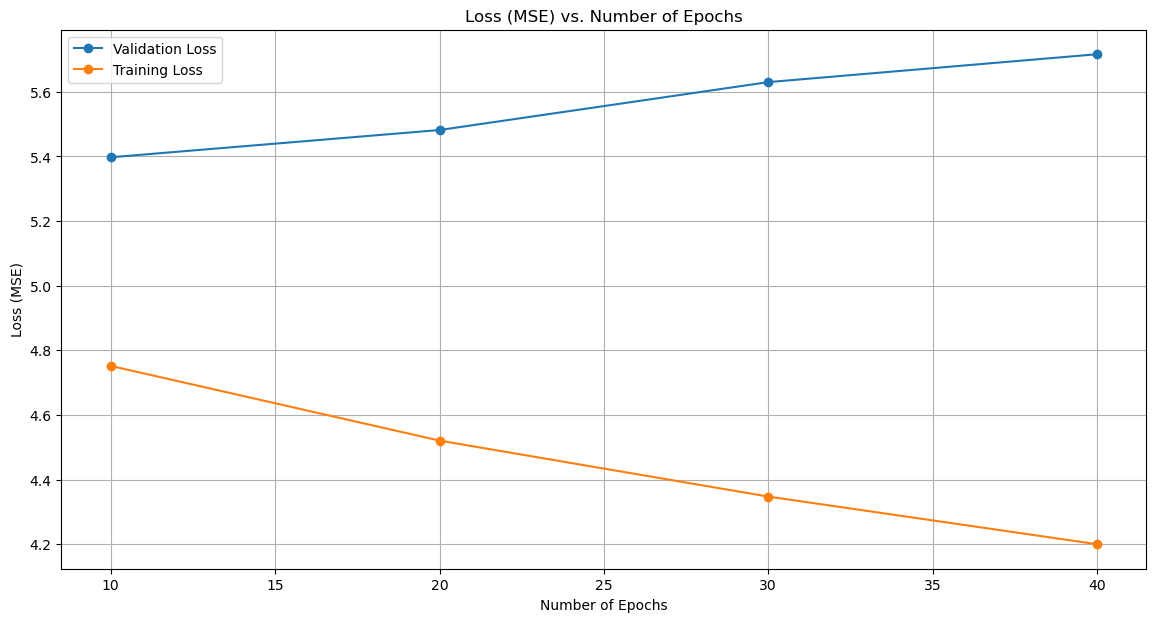

In [65]:
# Plotting loss vs number of epochs
plt.figure(figsize=(14, 7))
plt.plot(list(average_performance.keys()), list(average_performance.values()), marker='o', label='Validation Loss')
plt.plot(list(average_train_performance.keys()), list(average_train_performance.values()), marker='o', label='Training Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss (MSE) vs. Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
best_epoch = min(average_performance, key=average_performance.get)

In [61]:
summary_stats = {
    'Epoch': list(average_performance.keys()),
    'Mean Validation Loss': list(average_performance.values()),
    'Std Dev Validation Loss': list(std_performance.values()),
    'Min Validation Loss': list(min_performance.values()),
    'Max Validation Loss': list(max_performance.values()),
    'Mean Run Time (s)': list(average_run_times.values())
}

In [62]:
summary_df = pd.DataFrame(summary_stats)
summary_df

,Epoch,Mean Validation Loss,Std Dev Validation Loss,Min Validation Loss,Max Validation Loss,Mean Run Time (s)
0,10,5.397406,0.101138,5.238636,5.612429,151.570209
1,20,5.481667,0.125647,5.313730,5.868746,313.464929
2,30,5.629902,0.132760,5.436510,6.011434,479.248871
3,40,5.716181,0.111697,5.505332,6.073396,684.659036


In [63]:
print(f'The best number of epochs is: {best_epoch} with an average validation loss of {average_performance[best_epoch]:.4f}')

The best number of epochs is: 10 with an average validation loss of 5.3974


### Question 3

In [51]:
# Defining the input shape for the LSTM model based on the shape of X_train_lstm
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])

# Setting the number of epochs to the best number found in previous training steps
best_epoch = 10  

# Defining a list of different batch sizes to experiment with
batch_sizes = [4, 16, 64]

# Setting the number of runs for each batch size to ensure consistent performance measurement
runs = 30

# Initializing dictionaries to store performance metrics for each batch size
# performance: storing the validation performance
# train_performance: storing the training performance
# run_times: storing the run times for each batch size
performance = {batch_size: [] for batch_size in batch_sizes}
train_performance = {batch_size: [] for batch_size in batch_sizes}
run_times = {batch_size: [] for batch_size in batch_sizes}

In [52]:
# Running experiments
for batch_size in batch_sizes:
    for _ in range(runs):
        # Creating the LSTM model with the defined input shape
        model = create_lstm_model(input_shape)
        
        # Recording the start time before training the model
        start_time = time.time()
        
        # Training the model with the current batch size and recording the history
        history = model.fit(X_train_lstm, y_train_lstm, epochs=best_epoch, batch_size=batch_size, 
                            validation_data=(X_val_lstm, y_val_lstm), verbose=1)
        
        # Recording the end time after training the model
        end_time = time.time()

        # Getting the validation loss from the last epoch
        val_loss = history.history['val_loss'][-1]
        
        # Getting the training loss from the last epoch
        train_loss = history.history['loss'][-1]

        # Storing the validation loss for the current batch size
        performance[batch_size].append(val_loss)
        
        # Storing the training loss for the current batch size
        train_performance[batch_size].append(train_loss)
        
        # Storing the run time for the current batch size
        run_times[batch_size].append(end_time - start_time)

Epoch 1/10


C:\Users\vedan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7166/7166 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5.4193 - val_loss: 5.2274
Epoch 2/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.0626 - val_loss: 5.1951
Epoch 3/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.1118 - val_loss: 5.1836
Epoch 4/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9744 - val_loss: 5.2424
Epoch 5/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.9678 - val_loss: 5.2102
Epoch 6/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.0362 - val_loss: 5.2289
Epoch 7/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9354 - val_loss: 5.2598
Epoch 8/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.9442 - val_loss: 5.4244
Epoch 9/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.7764 - val_loss: 5.3843
Epoch 10/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.8626 - val_loss: 5.3298
Epoch 1/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5.5336 - val_loss: 5.2394
Epoch 2/10
7166/7166 ━━━━━━━━━━

7166/7166 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0197 - val_loss: 5.3009
Epoch 4/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.0262 - val_loss: 5.3354
Epoch 5/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9273 - val_loss: 5.2176
Epoch 6/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 5.0052 - val_loss: 5.3710
Epoch 7/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8859 - val_loss: 5.2590
Epoch 8/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.9096 - val_loss: 5.5187
Epoch 9/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 4.7989 - val_loss: 5.3814
Epoch 10/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 4.7007 - val_loss: 5.4221
Epoch 1/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.5477 - val_loss: 5.2069
Epoch 2/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.1061 - val_loss: 5.4624
Epoch 3/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.0011 - val_loss: 5.1646
Epoch 4/10
7166/7166 ━━━━━━━━━━

7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9225 - val_loss: 5.2478
Epoch 6/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8889 - val_loss: 5.4124
Epoch 7/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8325 - val_loss: 5.2895
Epoch 8/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.8956 - val_loss: 5.3132
Epoch 9/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7984 - val_loss: 5.3801
Epoch 10/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.7765 - val_loss: 5.3211
Epoch 1/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 5.6132 - val_loss: 5.2073
Epoch 2/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 5.1079 - val_loss: 5.2637
Epoch 3/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 5.0781 - val_loss: 5.5838
Epoch 4/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9750 - val_loss: 5.2710
Epoch 5/10
7166/7166 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 4.9363 - val_loss: 5.1563
Epoch 6/10
7166/7166 ━━━━━━━━━━

Epoch 2/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1040 - val_loss: 5.4226
Epoch 3/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.0388 - val_loss: 5.2401
Epoch 4/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9624 - val_loss: 5.1567
Epoch 5/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9597 - val_loss: 5.2493
Epoch 6/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8742 - val_loss: 5.2779
Epoch 7/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8787 - val_loss: 5.3402
Epoch 8/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8772 - val_loss: 5.2143
Epoch 9/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8612 - val_loss: 5.3726
Epoch 10/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8341 - val_loss: 5.2664
Epoch 1/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.9829 - val_loss: 5.1230
Epoch 2/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.0626 - val_loss: 5.1473
Epoch 3/10
1792/1792 ━━━━━━━━━━

1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9399 - val_loss: 5.2214
Epoch 7/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8821 - val_loss: 5.3595
Epoch 8/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8442 - val_loss: 5.1899
Epoch 9/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8694 - val_loss: 5.1935
Epoch 10/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8532 - val_loss: 5.2002
Epoch 1/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.8028 - val_loss: 5.5932
Epoch 2/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1488 - val_loss: 5.1221
Epoch 3/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1078 - val_loss: 5.3188
Epoch 4/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.0609 - val_loss: 5.1852
Epoch 5/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9404 - val_loss: 5.4171
Epoch 6/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.9349 - val_loss: 5.2103
Epoch 7/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 

1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8612 - val_loss: 5.2498
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.4423 - val_loss: 5.1524
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0855 - val_loss: 5.1356
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1484 - val_loss: 5.1849
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0821 - val_loss: 5.1352
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1090 - val_loss: 5.1835
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0699 - val_loss: 5.1302
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0255 - val_loss: 5.2368
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9566 - val_loss: 5.2125
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9568 - val_loss: 5.1859
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8979 - val_loss: 5.4751
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0111 - val_loss: 5.1496
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9853 - val_loss: 5.1952
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0578 - val_loss: 5.1275
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9363 - val_loss: 5.1598
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9351 - val_loss: 5.3154
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.0798 - val_loss: 5.2281
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1280 - val_loss: 5.1140
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0688 - val_loss: 5.3010
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1645 - val_loss: 5.1123
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0982 - val_loss: 5.2615
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0532 - val_loss: 5.1425
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.01

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1406 - val_loss: 5.1865
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1001 - val_loss: 5.1360
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9723 - val_loss: 5.1381
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9791 - val_loss: 5.1424
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0542 - val_loss: 5.2067
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0495 - val_loss: 5.1368
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0428 - val_loss: 5.1566
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9660 - val_loss: 5.3369
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9717 - val_loss: 5.3576
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.4760 - val_loss: 5.1552
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1089 - val_loss: 5.0995
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.08

In [53]:
# Calculate average performance
average_performance = {batch_size: np.mean(loss) for batch_size, loss in performance.items()}
average_train_performance = {batch_size: np.mean(loss) for batch_size, loss in train_performance.items()}
std_performance = {batch_size: np.std(loss) for batch_size, loss in performance.items()}
min_performance = {batch_size: np.min(loss) for batch_size, loss in performance.items()}
max_performance = {batch_size: np.max(loss) for batch_size, loss in performance.items()}
average_run_times = {batch_size: np.mean(time) for batch_size, time in run_times.items()}

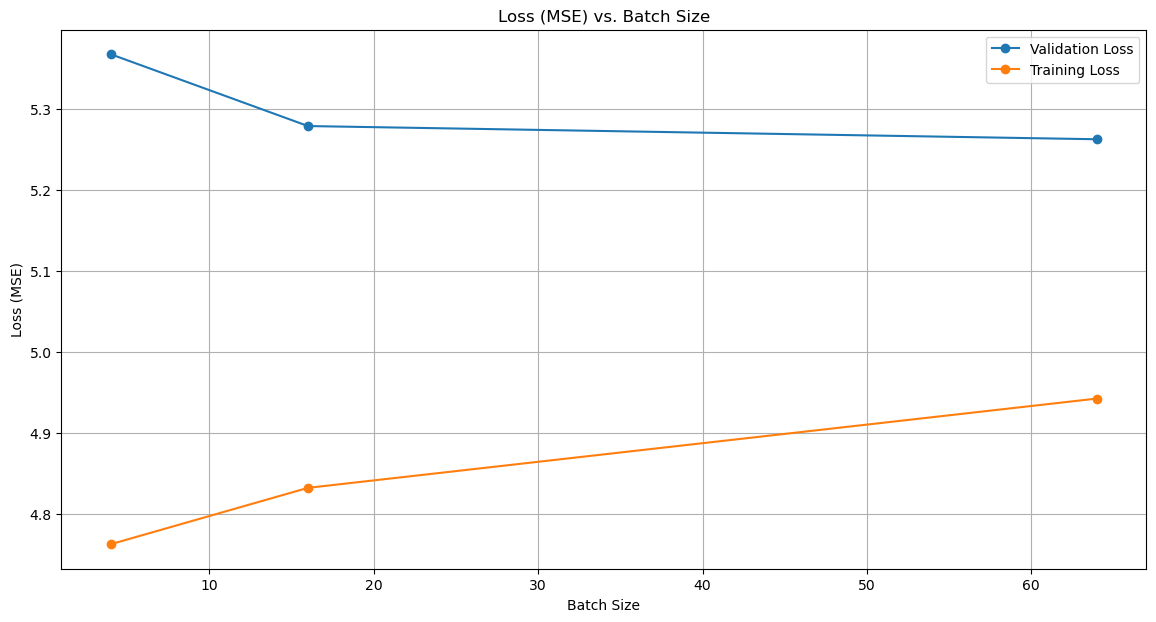

In [54]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(list(average_performance.keys()), list(average_performance.values()), marker='o', label='Validation Loss')
plt.plot(list(average_train_performance.keys()), list(average_train_performance.values()), marker='o', label='Training Loss')
plt.xlabel('Batch Size')
plt.ylabel('Loss (MSE)')
plt.title('Loss (MSE) vs. Batch Size')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
summary_stats = {
    'Batch Size': list(average_performance.keys()),
    'Mean Validation Loss': list(average_performance.values()),
    'Std Dev Validation Loss': list(std_performance.values()),
    'Min Validation Loss': list(min_performance.values()),
    'Max Validation Loss': list(max_performance.values()),
    'Mean Run Time (s)': list(average_run_times.values())
}

In [56]:
summary_df = pd.DataFrame(summary_stats)
summary_df

,Batch Size,Mean Validation Loss,Std Dev Validation Loss,Min Validation Loss,Max Validation Loss,Mean Run Time (s)
0,4,5.367223,0.066310,5.216545,5.530620,163.561163
1,16,5.278654,0.059481,5.186803,5.462351,43.689676
2,64,5.262372,0.089225,5.146089,5.528199,14.019266


In [57]:
best_batch_size = min(average_performance, key=average_performance.get)
print(f'The best batch size is: {best_batch_size} with an average validation loss of {average_performance[best_batch_size]:.4f}')

The best batch size is: 64 with an average validation loss of 5.2624


### Question 4

In [60]:
def create_lstm_model(input_shape, neurons):
    # Creating a Sequential model
    model = Sequential()
    
    # Adding an LSTM layer with the specified number of neurons and input shape
    model.add(LSTM(neurons, input_shape=input_shape))
    
    # Adding a Dense layer with one output unit
    model.add(Dense(1))
    
    # Compiling the model with the Adam optimizer and mean squared error loss function
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    
    # Returning the compiled model
    return model

In [61]:
# Setting experiment configurations
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])

# Setting the number of epochs to the best number found in previous training steps
best_epoch = 10  

# Setting the batch size to the best batch size found in previous training steps
best_batch_size = 64  

# Defining different numbers of neurons to test in the LSTM model
neuron_counts = [10, 20, 50]

# Setting the number of runs for each neuron count to ensure consistent performance measurement
runs = 30

# Initializing dictionaries to store performance metrics for each neuron count
# performance: storing the validation performance
# train_performance: storing the training performance
# run_times: storing the run times for each neuron count
performance = {neurons: [] for neurons in neuron_counts}
train_performance = {neurons: [] for neurons in neuron_counts}
run_times = {neurons: [] for neurons in neuron_counts}

In [62]:
# Running experiments with different neuron counts
for neurons in neuron_counts:
    for _ in range(runs):
        # Creating the LSTM model with the specified number of neurons
        model = create_lstm_model(input_shape, neurons)
        
        # Recording the start time before training the model
        start_time = time.time()
        
        # Training the model with the best batch size and recording the history
        history = model.fit(X_train_lstm, y_train_lstm, epochs=best_epoch, batch_size=best_batch_size, 
                            validation_data=(X_val_lstm, y_val_lstm), verbose=1)
        
        # Recording the end time after training the model
        end_time = time.time()

        # Getting the validation loss from the last epoch
        val_loss = history.history['val_loss'][-1]
        
        # Getting the training loss from the last epoch
        train_loss = history.history['loss'][-1]

        # Storing the validation loss for the current number of neurons
        performance[neurons].append(val_loss)
        
        # Storing the training loss for the current number of neurons
        train_performance[neurons].append(train_loss)
        
        # Storing the run time for the current number of neurons
        run_times[neurons].append(end_time - start_time)

Epoch 1/10


C:\Users\vedan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.5225 - val_loss: 5.1221
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1138 - val_loss: 5.1864
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0461 - val_loss: 5.1639
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0981 - val_loss: 5.1207
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0052 - val_loss: 5.1319
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0975 - val_loss: 5.2823
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9572 - val_loss: 5.1744
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9821 - val_loss: 5.1593
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9938 - val_loss: 5.1392
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0026 - val_loss: 5.2574
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.8269 - val_loss: 5.1277
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.05

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9593 - val_loss: 5.1597
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9736 - val_loss: 5.1448
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9222 - val_loss: 5.2093
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9649 - val_loss: 5.1350
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.9732 - val_loss: 5.3537
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0981 - val_loss: 5.2162
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0745 - val_loss: 5.2643
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0194 - val_loss: 5.1377
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0413 - val_loss: 5.1799
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0327 - val_loss: 5.1461
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9453 - val_loss: 5.1512
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.94

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1099 - val_loss: 5.1833
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0332 - val_loss: 5.1590
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9829 - val_loss: 5.1991
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0950 - val_loss: 5.1299
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9976 - val_loss: 5.1866
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9033 - val_loss: 5.1570
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9322 - val_loss: 5.2009
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9920 - val_loss: 5.1612
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.3629 - val_loss: 5.1574
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2079 - val_loss: 5.0992
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0286 - val_loss: 5.1671
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.99

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0119 - val_loss: 5.2392
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9717 - val_loss: 5.2264
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.0139 - val_loss: 5.1159
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0823 - val_loss: 5.1134
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9880 - val_loss: 5.1752
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0702 - val_loss: 5.2579
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1192 - val_loss: 5.2702
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9806 - val_loss: 5.4833
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0625 - val_loss: 5.2716
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1102 - val_loss: 5.1689
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0015 - val_loss: 5.1856
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9492 - val_loss: 5.3343
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0144 - val_loss: 5.1612
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9995 - val_loss: 5.1353
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9574 - val_loss: 5.1868
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9921 - val_loss: 5.1432
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9582 - val_loss: 5.1518
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.2435 - val_loss: 5.0811
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0694 - val_loss: 5.2079
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9985 - val_loss: 5.1218
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0653 - val_loss: 5.2629
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0761 - val_loss: 5.1239
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.10

448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.1421 - val_loss: 5.5656
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1083 - val_loss: 5.2089
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1090 - val_loss: 5.4542
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1043 - val_loss: 5.2442
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0579 - val_loss: 5.5974
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0602 - val_loss: 5.1360
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9690 - val_loss: 5.2566
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0504 - val_loss: 5.1709
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9537 - val_loss: 5.2950
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9914 - val_loss: 5.3617
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.2733 - val_loss: 5.1312
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.15

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9548 - val_loss: 5.1288
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9564 - val_loss: 5.2281
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9557 - val_loss: 5.2868
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9193 - val_loss: 5.2522
Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7.1513 - val_loss: 5.0879
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1361 - val_loss: 5.1251
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0845 - val_loss: 5.1363
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1223 - val_loss: 5.1443
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.0347 - val_loss: 5.1523
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9992 - val_loss: 5.2331
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8997 - val_loss: 5.2905
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.93

In [63]:
# Calculate average performance
average_performance = {neurons: np.mean(loss) for neurons, loss in performance.items()}
average_train_performance = {neurons: np.mean(loss) for neurons, loss in train_performance.items()}
std_performance = {neurons: np.std(loss) for neurons, loss in performance.items()}
min_performance = {neurons: np.min(loss) for neurons, loss in performance.items()}
max_performance = {neurons: np.max(loss) for neurons, loss in performance.items()}
average_run_times = {neurons: np.mean(time) for neurons, time in run_times.items()}

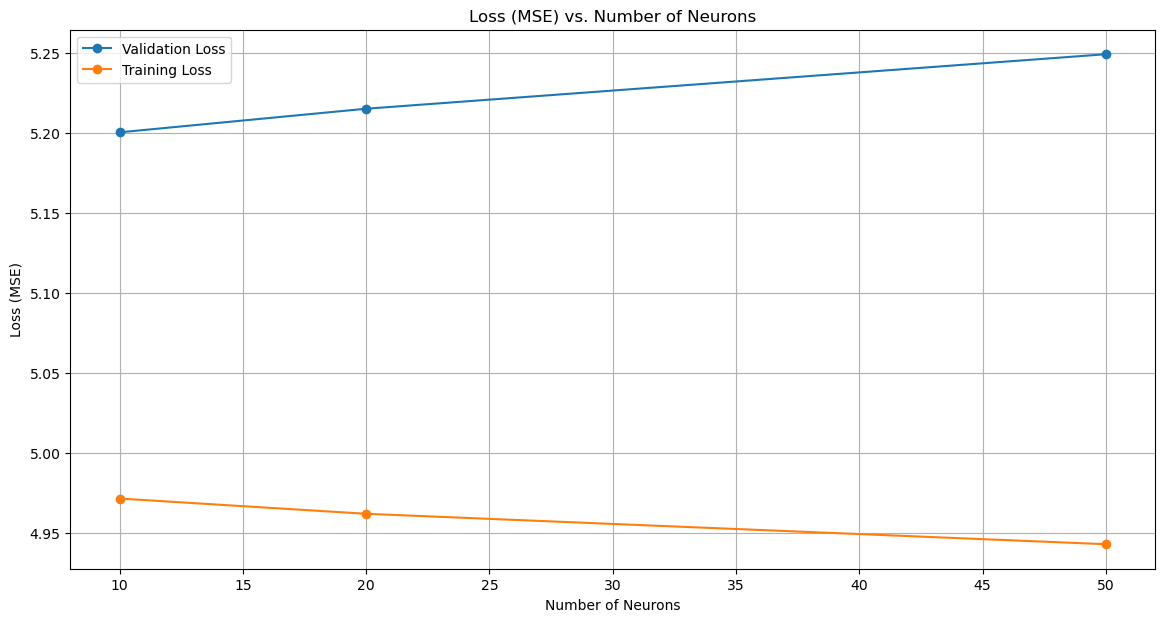

In [64]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(list(average_performance.keys()), list(average_performance.values()), marker='o', label='Validation Loss')
plt.plot(list(average_train_performance.keys()), list(average_train_performance.values()), marker='o', label='Training Loss')
plt.xlabel('Number of Neurons')
plt.ylabel('Loss (MSE)')
plt.title('Loss (MSE) vs. Number of Neurons')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
summary_stats = {
    'Number of Neurons': list(average_performance.keys()),
    'Mean Validation Loss': list(average_performance.values()),
    'Std Dev Validation Loss': list(std_performance.values()),
    'Min Validation Loss': list(min_performance.values()),
    'Max Validation Loss': list(max_performance.values()),
    'Mean Run Time (s)': list(average_run_times.values())
}

In [66]:
summary_df = pd.DataFrame(summary_stats)
summary_df

,Number of Neurons,Mean Validation Loss,Std Dev Validation Loss,Min Validation Loss,Max Validation Loss,Mean Run Time (s)
0,10,5.200459,0.055980,5.126758,5.335416,12.891502
1,20,5.215216,0.045486,5.151762,5.328382,12.979471
2,50,5.249302,0.075370,5.150424,5.406557,14.246329


In [67]:
best_neurons = min(average_performance, key=average_performance.get)
print(f'The best number of neurons is: {best_neurons} with an average validation loss of {average_performance[best_neurons]:.4f}')

The best number of neurons is: 10 with an average validation loss of 5.2005


### Final Model 

In [74]:
# Define the LSTM model
def create_final_model(input_shape):
    model = Sequential()
    model.add(LSTM(10, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    return model

In [85]:
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
best_epoch = 10
best_batch_size = 64

In [86]:
# Create and train the model
final_model = create_final_model(input_shape)
final_model.fit(X_train_lstm, y_train_lstm, epochs=best_epoch, batch_size=best_batch_size, validation_data=(X_val_lstm, y_val_lstm), verbose=1)

Epoch 1/10


C:\Users\vedan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 8.7970 - val_loss: 5.2448
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.1587 - val_loss: 5.2479
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.1542 - val_loss: 5.1167
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0416 - val_loss: 5.1400
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0793 - val_loss: 5.3144
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.9880 - val_loss: 5.1354
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.9775 - val_loss: 5.2780
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.9668 - val_loss: 5.2957
Epoch 9/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0519 - val_loss: 5.1179
Epoch 10/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.9891 - val_loss: 5.1425


In [87]:
# Make predictions
predictions = final_model.predict(X_val_lstm)

384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [88]:
# Calculate MSE, RMSE, and R² score
mse = mean_squared_error(y_val_lstm, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_lstm, predictions)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MSE: 5.142461147113522
RMSE: 2.2676995275197998
R² Score: 0.012640601371955995


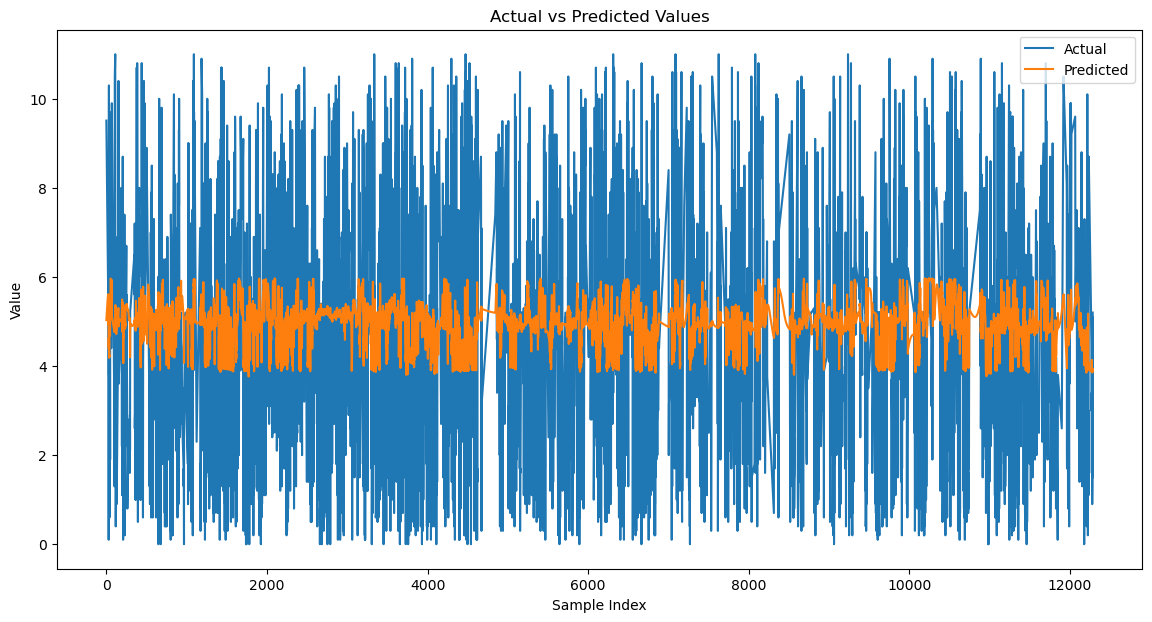

In [89]:
# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_val_lstm, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()